## Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Definitions of churn : There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In this project, we will use the usage-based definition to define churn.

High-value churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## Goal

Build models:-
To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

Identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [348]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing required libraries.
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Importing SMOTE
from imblearn.over_sampling import SMOTE
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

#setting various useful options
%matplotlib inline
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 300)

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

# This project is done with
# NumPy version: 1.20.3 | Pandas version: 1.3.4 | Seaborn version: 0.11.2

'NumPy version: 1.21.6 | Pandas version: 1.3.5 | Seaborn version: 0.11.2'

## Data Ingestion

In [351]:
# reading the data into a pandas dataframe

df = pd.read_csv("telecom_churn_data.csv")

In [352]:
# checking out the dataframe

df.head().T

0           1           2           3  \
mobile_number             7000842753  7001865778  7001625959  7001204172   
circle_id                        109         109         109         109   
loc_og_t2o_mou                   0.0         0.0         0.0         0.0   
std_og_t2o_mou                   0.0         0.0         0.0         0.0   
loc_ic_t2o_mou                   0.0         0.0         0.0         0.0   
last_date_of_month_6       6/30/2014   6/30/2014   6/30/2014   6/30/2014   
last_date_of_month_7       7/31/2014   7/31/2014   7/31/2014   7/31/2014   
last_date_of_month_8       8/31/2014   8/31/2014   8/31/2014   8/31/2014   
last_date_of_month_9       9/30/2014   9/30/2014   9/30/2014   9/30/2014   
arpu_6                       197.385      34.047      167.69     221.338   
arpu_7                       214.816     355.074     189.058     251.102   
arpu_8                       213.803     268.321     210.226     508.054   
arpu_9                          21.1      86.285     290.714       389.5   
onnet_mou_6                      NaN       24.11       11.54       99.91   
onnet_mou_7                      NaN       78.68       55.24       54.39   
onnet_mou_8                      0.0        7.68       37.26      310.98   
onnet_mou_9                      NaN       18.34       74.81      241.71   
offnet_mou_6                     NaN       15.74      143.33      123.31   
offnet_mou_7                     NaN       99.84      220.59      109.01   
offnet_mou_8                     0.0      304.76      208.36       71.68   
offnet_mou_9                     NaN       53.76      118.91      113.54   
roam_ic_mou_6                    NaN         0.0         0.0         0.0   
roam_ic_mou_7                    NaN         0.0         0.0       54.86   
roam_ic_mou_8                    0.0         0.0         0.0       44.38   
roam_ic_mou_9                    NaN         0.0       38.49         0.0   
roam_og_mou_6                    NaN         0.0         0.0         0.0   
roam_og_mou_7                    NaN         0.0         0.0       28.09   
roam_og_mou_8                    0.0         0.0         0.0       39.04   
roam_og_mou_9                    NaN         0.0       70.94         0.0   
loc_og_t2t_mou_6                 NaN       23.88        7.19       73.68   
loc_og_t2t_mou_7                 NaN       74.56       28.74       34.81   
loc_og_t2t_mou_8                 0.0        7.68       13.58       10.61   
loc_og_t2t_mou_9                 NaN       18.34       14.39       15.49   
loc_og_t2m_mou_6                 NaN       11.51       29.34      107.43   
loc_og_t2m_mou_7                 NaN       75.94       16.86       83.21   
loc_og_t2m_mou_8                 0.0      291.86       38.46       22.46   
loc_og_t2m_mou_9                 NaN       53.76       28.16       65.46   
loc_og_t2f_mou_6                 NaN         0.0       24.11        1.91   
loc_og_t2f_mou_7                 NaN         0.0       21.79        0.65   
loc_og_t2f_mou_8                 0.0         0.0       15.61        4.91   
loc_og_t2f_mou_9                 NaN         0.0       22.24        2.06   
loc_og_t2c_mou_6                 NaN         0.0         0.0         0.0   
loc_og_t2c_mou_7                 NaN        2.91      135.54         0.0   
loc_og_t2c_mou_8                 0.0         0.0       45.76         0.0   
loc_og_t2c_mou_9                 NaN         0.0        0.48         0.0   
loc_og_mou_6                     NaN       35.39       60.66      183.03   
loc_og_mou_7                     NaN      150.51       67.41      118.68   
loc_og_mou_8                     0.0      299.54       67.66       37.99   
loc_og_mou_9                     NaN       72.11       64.81       83.03   
std_og_t2t_mou_6                 NaN        0.23        4.34       26.23   
std_og_t2t_mou_7                 NaN        4.11       26.49       14.89   
std_og_t2t_mou_8                 0.0         0.0       22.58      289.58   
std_og_

In [353]:
# figuring out the shape of the original dataframe.

df.shape

(99999, 226)

## Data Cleaning

In [354]:
# finding out unique value count in the dataframe. This will help us identify columns which shows no variance
# and hence can be dropped.

unique_value_count = df.nunique(axis=0)

unique_value_count[unique_value_count <2]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64

In [355]:
# filtering out column names whose unique value count = 1 as it has no variance in them.

cols_to_drop = unique_value_count[unique_value_count <2].index.tolist()

* We will also add `mobile_number` to the list of `cols_to_drop` as it is an unique identifier and in no way contributes to the insight of churn prediction.

In [356]:
cols_to_drop.append('mobile_number')

In [357]:
print(cols_to_drop)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'mobile_number']


In [358]:
print(f' Total {len(cols_to_drop)} columns will be dropped from the original dataframe of telecom churn as they are having fixed value.')
df.drop(cols_to_drop, axis=1, inplace = True)

 Total 17 columns will be dropped from the original dataframe of telecom churn as they are having fixed value.


In [359]:
# checking out the current shape of the dataframe after dropping the columns. The initial size was (99999, 226).

df.shape

(99999, 209)

In [360]:
# checking the datatypes of the columns to see if there is any mismatch.

df.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2m_mou_9            

In [361]:
# filtering out the columns with date_ in them which has been interpreted as object in pandas.

cols_to_datetime = df.loc[:,df.columns.str.contains('date_',regex=True)].columns.tolist()

In [362]:
# converting the columns with date_ in them to datetime data-type from object data-type.

for i in cols_to_datetime:
    df[i] = pd.to_datetime(df[i])

In [363]:
# checking whether conversion to datetime data-type was successful.

df[cols_to_datetime].dtypes

date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_9         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
dtype: object

In [364]:
# figuring out the columns which have missing values and sorting them in descending order for easy review.

missing_values_records = df.isnull().mean().round(4).multiply(100).sort_values(ascending=False)
missing_values_records [missing_values_records > 0]

arpu_3g_6                   74.85
night_pck_user_6            74.85
count_rech_3g_6             74.85
max_rech_data_6             74.85
av_rech_amt_data_6          74.85
total_rech_data_6           74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
fb_user_6                   74.85
arpu_2g_6                   74.85
night_pck_user_7            74.43
fb_user_7                   74.43
count_rech_2g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
total_rech_data_9           74.08
fb_user_9                   74.08
max_rech_data_9             74.08
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
arpu_3g_9                   74.08
count_rech_3g_

In [365]:
# Extracting the feature names which have missing values as identified in the preceeding code.

features_with_missing_values = missing_values_records[missing_values_records>0.0].index.tolist()

In [366]:
print(f'There are {len(features_with_missing_values)} columns with missing values in them')

There are 152 columns with missing values in them


In [367]:
# filtering out recharge related columns from the original dataframe for missing value imputation.
# the column is identified by *_rech_* in the name.

cols_with_rech_word = df.loc[:,df.columns.str.contains('_rech_',regex=True)].columns.tolist()

In [368]:
# Number of columns with the word _rech_ in them.

len(cols_with_rech_word)

40

In [369]:
# filtering out recharge related column that have missing values in them from the whole list of cols_with_rech_word

missing_with_rech_word = []
for j in cols_with_rech_word:
    if j in features_with_missing_values:
        missing_with_rech_word.append(j)

In [370]:
# Number of columns with the word _rech_ in them that have missing values.

len(missing_with_rech_word)

28

In [371]:
print(missing_with_rech_word)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


#### Missing value imputation for columns containing keyword `_rech_` in the month of June which is represented in the dataset by `_6`

In [372]:
df[df['date_of_last_rech_6'].isnull()].loc[:,['date_of_last_rech_6','date_of_last_rech_data_6','total_rech_data_6',
                                              'max_rech_data_6','count_rech_2g_6',
                                              'count_rech_3g_6','av_rech_amt_data_6']].head(20)

date_of_last_rech_6 date_of_last_rech_data_6  total_rech_data_6  \
26                   NaT                      NaT                NaN   
91                   NaT                      NaT                NaN   
187                  NaT                      NaT                NaN   
198                  NaT                      NaT                NaN   
232                  NaT                      NaT                NaN   
263                  NaT                      NaT                NaN   
279                  NaT                      NaT                NaN   
371                  NaT                      NaT                NaN   
414                  NaT                      NaT                NaN   
431                  NaT                      NaT                NaN   
479                  NaT                      NaT                NaN   
497                  NaT                      NaT                NaN   
729                  NaT                      NaT                NaN   
974                  NaT                      NaT                NaN   
1189                 NaT                      NaT                NaN   
1203                 NaT                      NaT                NaN   
1273                 NaT                      NaT                NaN   
1282                 NaT                      NaT                NaN   
1287                 NaT                      NaT                NaN   
1334                 NaT                      NaT                NaN   

      max_rech_data_6  count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
26                NaN              NaN              NaN                 NaN  
91                NaN              NaN              NaN                 NaN  
187               NaN              NaN              NaN                 NaN  
198               NaN              NaN              NaN                 NaN  
232               NaN              NaN              NaN                 NaN  
263               NaN              NaN              NaN                 NaN  
279               NaN              NaN              NaN                 NaN  
371               NaN              NaN              NaN                 NaN  
414               NaN              NaN              NaN                 NaN  
431               NaN              NaN              NaN                 NaN  
479               NaN              NaN              NaN                 NaN  
497               NaN              NaN              NaN                 NaN  
729               NaN              NaN              NaN                 NaN  
974               NaN              NaN              NaN                 NaN  
1189              NaN              NaN              NaN                 NaN  
1203              NaN              NaN              NaN                 NaN  
1273              NaN              NaN              NaN                 NaN  
1282              NaN              NaN              NaN                 NaN  
1287              NaN              NaN              NaN                 NaN  
1334              NaN              NaN              NaN                 NaN

* For the above columns it seems that null values are representing the scenario where the customer has not done any recharge. Hence, we will be imputing columns `total_rech_data_6`, `max_rech_data_6`, `count_rech_2g_6`, `count_rech_3g_6` and `av_rech_amt_data_6` with 0.

In [373]:
cols_of_month_6 = ['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6']
for i in cols_of_month_6:
    df[i].fillna(value = 0, inplace=True)

#### Missing value imputation for columns containing keyword `_rech_` in the month of July which is represented in the dataset by `_7`

In [374]:
df[df['date_of_last_rech_7'].isnull()].loc[:,['date_of_last_rech_7','date_of_last_rech_data_7','total_rech_data_7',
                                              'max_rech_data_7','count_rech_2g_7',
                                              'count_rech_3g_7','av_rech_amt_data_7']].head(20)

date_of_last_rech_7 date_of_last_rech_data_7  total_rech_data_7  \
52                  NaT                      NaT                NaN   
68                  NaT                      NaT                NaN   
121                 NaT                      NaT                NaN   
130                 NaT                      NaT                NaN   
144                 NaT                      NaT                NaN   
201                 NaT                      NaT                NaN   
202                 NaT                      NaT                NaN   
216                 NaT                      NaT                NaN   
232                 NaT                      NaT                NaN   
275                 NaT                      NaT                NaN   
279                 NaT                      NaT                NaN   
324                 NaT                      NaT                NaN   
330                 NaT                      NaT                NaN   
404                 NaT                      NaT                NaN   
490                 NaT                      NaT                NaN   
582                 NaT                      NaT                NaN   
603                 NaT                      NaT                NaN   
663                 NaT                      NaT                NaN   
674                 NaT                      NaT                NaN   
679                 NaT                      NaT                NaN   

     max_rech_data_7  count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  
52               NaN              NaN              NaN                 NaN  
68               NaN              NaN              NaN                 NaN  
121              NaN              NaN              NaN                 NaN  
130              NaN              NaN              NaN                 NaN  
144              NaN              NaN              NaN                 NaN  
201              NaN              NaN              NaN                 NaN  
202              NaN              NaN              NaN                 NaN  
216              NaN              NaN              NaN                 NaN  
232              NaN              NaN              NaN                 NaN  
275              NaN              NaN              NaN                 NaN  
279              NaN              NaN              NaN                 NaN  
324              NaN              NaN              NaN                 NaN  
330              NaN              NaN              NaN                 NaN  
404              NaN              NaN              NaN                 NaN  
490              NaN              NaN              NaN                 NaN  
582              NaN              NaN              NaN                 NaN  
603              NaN              NaN              NaN                 NaN  
663              NaN              NaN              NaN                 NaN  
674              NaN              NaN              NaN                 NaN  
679              NaN              NaN              NaN                 NaN

* For the above columns it seems that null values are representing the scenario where the customer has not done any recharge. Hence, we will be imputing columns `total_rech_data_7`, `max_rech_data_7`, `count_rech_2g_7`, `count_rech_3g_7` and `av_rech_amt_data_7` with 0.

In [375]:
cols_of_month_7 = ['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7']
for i in cols_of_month_7:
    df[i].fillna(value = 0, inplace=True)

#### Missing value imputation for columns containing keyword `_rech_` in the month of August which is represented in the dataset by `_8`

In [376]:
df[df['date_of_last_rech_8'].isnull()].loc[:,['date_of_last_rech_8','date_of_last_rech_data_8','total_rech_data_8',
                                              'max_rech_data_8','count_rech_2g_8',
                                              'count_rech_3g_8','av_rech_amt_data_8']].head(20)

date_of_last_rech_8 date_of_last_rech_data_8  total_rech_data_8  \
121                 NaT                      NaT                NaN   
144                 NaT                      NaT                NaN   
152                 NaT                      NaT                NaN   
161                 NaT                      NaT                NaN   
188                 NaT                      NaT                NaN   
191                 NaT                      NaT                NaN   
202                 NaT                      NaT                NaN   
216                 NaT                      NaT                NaN   
248                 NaT                      NaT                NaN   
275                 NaT                      NaT                NaN   
276                 NaT                      NaT                NaN   
287                 NaT                      NaT                NaN   
315                 NaT                      NaT                NaN   
330                 NaT                      NaT                NaN   
452                 NaT                      NaT                NaN   
463                 NaT                      NaT                NaN   
490                 NaT                      NaT                NaN   
500                 NaT                      NaT                NaN   
577                 NaT                      NaT                NaN   
578                 NaT                      NaT                NaN   

     max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  
121              NaN              NaN              NaN                 NaN  
144              NaN              NaN              NaN                 NaN  
152              NaN              NaN              NaN                 NaN  
161              NaN              NaN              NaN                 NaN  
188              NaN              NaN              NaN                 NaN  
191              NaN              NaN              NaN                 NaN  
202              NaN              NaN              NaN                 NaN  
216              NaN              NaN              NaN                 NaN  
248              NaN              NaN              NaN                 NaN  
275              NaN              NaN              NaN                 NaN  
276              NaN              NaN              NaN                 NaN  
287              NaN              NaN              NaN                 NaN  
315              NaN              NaN              NaN                 NaN  
330              NaN              NaN              NaN                 NaN  
452              NaN              NaN              NaN                 NaN  
463              NaN              NaN              NaN                 NaN  
490              NaN              NaN              NaN                 NaN  
500              NaN              NaN              NaN                 NaN  
577              NaN              NaN              NaN                 NaN  
578              NaN              NaN              NaN                 NaN

* For the above columns it seems that null values are representing the scenario where the customer has not done any recharge. Hence, we will be imputing columns `total_rech_data_8`, `max_rech_data_8`, `count_rech_2g_8`, `count_rech_3g_8` and `av_rech_amt_data_8` with 0.

In [377]:
cols_of_month_8 = ['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8']
for i in cols_of_month_8:
    df[i].fillna(value = 0, inplace=True)

#### Missing value imputation for columns containing keyword `_rech_` in the month of September which is represented in the dataset by `_9`

In [378]:
df[df['date_of_last_rech_9'].isnull()].loc[:,['date_of_last_rech_9','date_of_last_rech_data_9','total_rech_data_9',
                                              'max_rech_data_9','count_rech_2g_9',
                                              'count_rech_3g_9','av_rech_amt_data_9']].head(20)

date_of_last_rech_9 date_of_last_rech_data_9  total_rech_data_9  \
11                  NaT                      NaT                NaN   
51                  NaT                      NaT                NaN   
67                  NaT                      NaT                NaN   
72                  NaT                      NaT                NaN   
144                 NaT                      NaT                NaN   
161                 NaT                      NaT                NaN   
188                 NaT                      NaT                NaN   
197                 NaT                      NaT                NaN   
201                 NaT                      NaT                NaN   
202                 NaT                      NaT                NaN   
216                 NaT                      NaT                NaN   
222                 NaT                      NaT                NaN   
232                 NaT                      NaT                NaN   
238                 NaT                      NaT                NaN   
256                 NaT                      NaT                NaN   
269                 NaT                      NaT                NaN   
275                 NaT                      NaT                NaN   
279                 NaT                      NaT                NaN   
287                 NaT                      NaT                NaN   
312                 NaT                      NaT                NaN   

     max_rech_data_9  count_rech_2g_9  count_rech_3g_9  av_rech_amt_data_9  
11               NaN              NaN              NaN                 NaN  
51               NaN              NaN              NaN                 NaN  
67               NaN              NaN              NaN                 NaN  
72               NaN              NaN              NaN                 NaN  
144              NaN              NaN              NaN                 NaN  
161              NaN              NaN              NaN                 NaN  
188              NaN              NaN              NaN                 NaN  
197              NaN              NaN              NaN                 NaN  
201              NaN              NaN              NaN                 NaN  
202              NaN              NaN              NaN                 NaN  
216              NaN              NaN              NaN                 NaN  
222              NaN              NaN              NaN                 NaN  
232              NaN              NaN              NaN                 NaN  
238              NaN              NaN              NaN                 NaN  
256              NaN              NaN              NaN                 NaN  
269              NaN              NaN              NaN                 NaN  
275              NaN              NaN              NaN                 NaN  
279              NaN              NaN              NaN                 NaN  
287              NaN              NaN              NaN                 NaN  
312              NaN              NaN              NaN                 NaN

* For the above columns it seems that null values are representing the scenario where the customer has not done any recharge. Hence, we will be imputing columns `total_rech_data_9`, `max_rech_data_9`, `count_rech_2g_9`, `count_rech_3g_9` and `av_rech_amt_data_9` with 0.

In [379]:
cols_of_month_9 = ['total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9']
for i in cols_of_month_9:
    df[i].fillna(value = 0, inplace=True)

In [380]:
# Rechecking the dataframe columns which have missing values and sorting them in decsending order for easy review.

missing_values_records = df.isnull().mean().round(4).multiply(100).sort_values(ascending=False)
missing_values_records [missing_values_records > 0]

date_of_last_rech_data_6    74.85
arpu_3g_6                   74.85
fb_user_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
fb_user_9                   74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
arpu_2g_8                   73.66
night_pck_user_8            73.66
fb_user_8                   73.66
arpu_3g_8                   73.66
std_og_t2m_mou_9             7.75
loc_og_mou_9                 7.75
loc_ic_t2m_mou_9             7.75
std_og_t2t_mou_9             7.75
loc_ic_t2t_mou_9             7.75
onnet_mou_9                  7.75
isd_ic_mou_9                 7.75
loc_og_t2c_mou_9             7.75
std_og_t2f_mou_9             7.75
og_others_9   

* We are getting more than 50% values are not available for `arpu_2g_*` and `arpu_3g_*` for the month of `6,7,8 and 9` and we have 2G/3G volume usage based data available so, we will be dropping these columns.
* The column `fb_user_*` and `night_pck_user_*` for each month from 6 to 8 respectively has a missing values above 50% and we don't have information availabe to impute them reliably. Hence we will be dropping these columns
* We have no further use of `date_of_last_rech_data_*` columns for the month of `6,7,8 and 9` ,also they have more than 50% missing values and we don't have any information available to impute them reliably so, we are dropping them.

In [381]:
# extracting column names with more than 50% missing values.

cols_missing_to_drop = missing_values_records[missing_values_records > 50].index.tolist()
cols_missing_to_drop

['date_of_last_rech_data_6',
 'arpu_3g_6',
 'fb_user_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_7',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'fb_user_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'date_of_last_rech_data_9',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'fb_user_8',
 'arpu_3g_8']

In [382]:
df.shape

(99999, 209)

In [383]:
# dropping columns with more than 50% missing values from the dataset.

df.drop(cols_missing_to_drop, axis=1,inplace=True)

In [384]:
# re-checking shape of the high value customer dataset after dropping. Initial size was (99999, 210)

df.shape

(99999, 189)

In [385]:
# re-checking missing values after dropping

missing_vals = df.isnull().mean().round(4).multiply(100).sort_values(ascending=False)
missing_vals = missing_vals[missing_vals>0]
print(missing_vals)
print(f'\nTotal columns with missing values is {len(missing_vals)}')

loc_ic_t2t_mou_9       7.75
loc_ic_mou_9           7.75
std_og_t2m_mou_9       7.75
loc_og_mou_9           7.75
std_og_t2f_mou_9       7.75
std_og_mou_9           7.75
loc_og_t2c_mou_9       7.75
isd_og_mou_9           7.75
loc_og_t2f_mou_9       7.75
spl_og_mou_9           7.75
og_others_9            7.75
loc_og_t2m_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_og_t2t_mou_9       7.75
std_og_t2t_mou_9       7.75
roam_og_mou_9          7.75
loc_ic_t2f_mou_9       7.75
std_ic_mou_9           7.75
onnet_mou_9            7.75
roam_ic_mou_9          7.75
ic_others_9            7.75
std_ic_t2m_mou_9       7.75
std_ic_t2f_mou_9       7.75
isd_ic_mou_9           7.75
offnet_mou_9           7.75
spl_ic_mou_9           7.75
std_ic_t2t_mou_9       7.75
std_og_t2f_mou_8       5.38
ic_others_8            5.38
std_og_mou_8           5.38
isd_ic_mou_8           5.38
isd_og_mou_8           5.38
std_ic_t2t_mou_8       5.38
spl_og_mou_8           5.38
spl_ic_mou_8           5.38
og_others_8         

#### Handling missing values for columns with the keyword `_mou_` in them i.e. minutes of usage

In [386]:
# for the month of june
missing_cols_with_mou_6 = missing_vals[missing_vals.index.str.contains('_mou_6',regex=True)].index.tolist()
len(missing_cols_with_mou_6)

25

In [387]:
# for the month of july
missing_cols_with_mou_7 = missing_vals[missing_vals.index.str.contains('_mou_7',regex=True)].index.tolist()
len(missing_cols_with_mou_7)

25

In [388]:
# for the month of august
missing_cols_with_mou_8 = missing_vals[missing_vals.index.str.contains('_mou_8',regex=True)].index.tolist()
len(missing_cols_with_mou_8)

25

In [389]:
# for the month of september
missing_cols_with_mou_9 = missing_vals[missing_vals.index.str.contains('_mou_9',regex=True)].index.tolist()
len(missing_cols_with_mou_9)

25

In [390]:
# checking the associated rows with _mou_ one of the feature loc_ic_mou is missing for the month of June

df[df['loc_ic_mou_6'].isnull()].loc[:,missing_cols_with_mou_6].T


0      15     26     37     51     68     77     120    \
loc_og_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_6       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_6       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_6         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  201    202    232    269    275    277    279    364    \
loc_og_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_6       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2m_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2f_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_6    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_6       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_6        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_6         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  371    391    392    414    423    479    484 

In [391]:
# checking the associated rows with _mou_ one of the feature loc_ic_mou is missing for the month of July
df[df['loc_ic_mou_7'].isnull()].loc[:,missing_cols_with_mou_7].T

0      10     35     45     68     120    144    180    \
std_ic_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_7       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_7         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_7       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  201    202    216    228    232    248    269    275    \
std_ic_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_7       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_7         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_7       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_7        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2t_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_7    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  276    279    330    335    361    371    404 

In [392]:
# checking the associated rows with _mou_ one of the feature loc_ic_mou is missing for the month of August
df[df['loc_ic_mou_8'].isnull()].loc[:,missing_cols_with_mou_8].T

35     45     111    129    138    143    144    161    \
std_og_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_8         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_8       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_8       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  188    194    201    202    216    222    227    232    \
std_og_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_8         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_8       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_8        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_8       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_8    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  239    248    275    276    279    287    330 

In [393]:
# checking the associated rows with _mou_ one of the feature loc_ic_mou is missing for the month of September
df[df['loc_ic_mou_9'].isnull()].loc[:,missing_cols_with_mou_9].T

0      7      29     32     35     45     67     83     \
loc_ic_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_9       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_9         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_9       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  86     97     111    129    143    144    161    179    \
loc_ic_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2c_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_og_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_og_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_og_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_og_mou_9       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
loc_ic_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
onnet_mou_9         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
roam_ic_mou_9       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2m_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2f_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
isd_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
offnet_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
spl_ic_mou_9        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std_ic_t2t_mou_9    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  188    194    197    201    202    216    222 

In [394]:
# checking the data distribution of the mou columns for the month of June
df[missing_cols_with_mou_6].describe()

loc_og_t2t_mou_6  loc_ic_mou_6  std_ic_t2f_mou_6  spl_ic_mou_6  \
count      96062.000000  96062.000000      96062.000000  96062.000000   
mean          47.100763    167.491059          2.156397      0.061557   
std          150.856393    254.124029         16.495594      0.160920   
min            0.000000      0.000000          0.000000      0.000000   
25%            1.660000     30.390000          0.000000      0.000000   
50%           11.910000     92.160000          0.000000      0.000000   
75%           40.960000    208.075000          0.000000      0.000000   
max         6431.330000   7454.630000       1351.110000     19.760000   

       loc_ic_t2f_mou_6  loc_og_t2m_mou_6  roam_ic_mou_6  loc_ic_t2m_mou_6  \
count      96062.000000      96062.000000   96062.000000      96062.000000   
mean          12.084305         93.342088       9.950013        107.475650   
std           40.140895        162.780544      72.825411        171.713903   
min            0.000000          0.000000       0.000000          0.000000   
25%            0.000000          9.880000       0.000000         17.290000   
50%            0.880000         41.030000       0.000000         56.490000   
75%            8.140000        110.390000       0.000000        132.387500   
max         1872.340000       4729.740000   13724.380000       4693.860000   

       std_ic_mou_6  std_ic_t2t_mou_6  loc_ic_t2t_mou_6  std_og_t2m_mou_6  \
count  96062.000000      96062.000000      96062.000000      96062.000000   
mean      32.457179          9.575993         47.922365         87.299624   
std      106.283386         54.330607        140.258485        255.617850   
min        0.000000          0.000000          0.000000          0.000000   
25%        0.000000          0.000000          2.990000          0.000000   
50%        5.890000          0.000000         15.690000          3.950000   
75%       26.930000          4.060000         46.840000         53.290000   
max     5712.110000       5459.560000       6626.930000       8314.760000   

       loc_og_t2f_mou_6  std_ic_t2m_mou_6  offnet_mou_6  std_og_t2f_mou_6  \
count      96062.000000      96062.000000  96062.000000      96062.000000   
mean           3.751013         20.722240    197.935577          1.129011   
std           14.230438         80.793414    316.851613          7.984970   
min            0.000000          0.000000      0.000000          0.000000   
25%            0.000000          0.000000     34.730000          0.000000   
50%            0.000000          2.030000     96.310000          0.000000   
75%            2.080000         15.030000    231.860000          0.000000   
max         1466.030000       5647.160000   8362.360000        628.560000   

       loc_og_t2c_mou_6  isd_ic_mou_6  spl_og_mou_6  std_og_t2t_mou_6  \
count      96062.000000  96062.000000  96062.000000      96062.000000   
mean           1.123056      7.460608      3.916811         79.829870   
std            5.448946     59.722948     14.936449        252.476533   
min            0.000000      0.000000      0.000000          0.000000   
25%            0.000000      0.000000      0.000000          0.000000   
50%            0.000000      0.000000      0.000000          0.000000   
75%            0.000000      0.000000      2.430000         30.807500   
max          342.860000   6789.410000   1023.210000       7366.580000   

       roam_og_mou_6  isd_og_mou_6  std_og_mou_6  loc_og_mou_6   onnet_mou_6  
count   96062.000000  96062.000000  96062.000000  96062.000000  96062.000000  
mean       13.911337      0.798277    168.261218    144.201175    132.395875  
std        71.443196     25.765248    389.948499    251.751489    297.207406  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.000000     17.110000      7.380000  
50%         0.000000      0.000000     11.640000     65.110000     34.310000  
75%         0.000000      0.000000    144.83750

In [395]:
# checking the data distribution of the mou columns for the month of July
df[missing_cols_with_mou_7].describe()

std_ic_t2m_mou_7  spl_ic_mou_7  std_og_t2m_mou_7  roam_ic_mou_7  \
count      96140.000000  96140.000000      96140.000000   96140.000000   
mean          21.656415      0.033585         90.804137       7.149898   
std           86.521393      0.155725        269.347911      73.447948   
min            0.000000      0.000000          0.000000       0.000000   
25%            0.000000      0.000000          0.000000       0.000000   
50%            2.040000      0.000000          3.635000       0.000000   
75%           15.740000      0.000000         54.040000       0.000000   
max         6141.880000     21.330000       9284.740000   15371.040000   

       isd_ic_mou_7  std_ic_mou_7  offnet_mou_7   onnet_mou_7  \
count  96140.000000  96140.000000  96140.000000  96140.000000   
mean       8.334936     33.887833    197.045133    133.670805   
std       65.219829    113.720168    325.862803    308.794148   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000     32.190000      6.660000   
50%        0.000000      5.960000     91.735000     32.330000   
75%        0.000000     28.310000    226.815000    115.595000   
max     5289.540000   6745.760000   9667.130000   8157.780000   

       std_ic_t2f_mou_7  roam_og_mou_7  std_og_t2t_mou_7  std_ic_t2t_mou_7  \
count      96140.000000   96140.000000      96140.000000      96140.000000   
mean           2.216923       9.818732         83.299598         10.011904   
std           16.454061      58.455762        263.631042         57.411971   
min            0.000000       0.000000          0.000000          0.000000   
25%            0.000000       0.000000          0.000000          0.000000   
50%            0.000000       0.000000          0.000000          0.000000   
75%            0.000000       0.000000         31.132500          4.230000   
max         1136.080000    2812.040000       8133.660000       5800.930000   

       std_og_t2f_mou_7  std_og_mou_7  loc_og_mou_7  isd_og_mou_7  \
count      96140.000000  96140.000000  96140.000000  96140.000000   
mean           1.115010    175.221436    141.670476      0.776572   
std            8.599406    408.922934    248.731086     25.603052   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000     17.480000      0.000000   
50%            0.000000     11.090000     63.685000      0.000000   
75%            0.000000    150.615000    164.382500      0.000000   
max          544.630000  10936.730000   7674.780000   5490.280000   

       loc_og_t2c_mou_7  spl_og_mou_7  loc_og_t2f_mou_7  loc_og_t2m_mou_7  \
count      96140.000000  96140.000000      96140.000000      96140.000000   
mean           1.368500      4.978279          3.792985         91.397131   
std            7.533445     20.661570         14.264986        157.492308   
min            0.000000      0.000000          0.000000          0.000000   
25%            0.000000      0.000000          0.000000         10.025000   
50%            0.000000      0.000000          0.000000         40.430000   
75%            0.000000      3.710000          2.090000        107.560000   
max          916.240000   2372.510000       1196.430000       4557.140000   

       loc_og_t2t_mou_7  loc_ic_mou_7  loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  \
count      96140.000000  96140.000000      96140.000000      96140.000000   
mean          46.473010    167.719540         47.990520        107.120493   
std          155.318705    256.242707        145.795055        169.423620   
min            0.000000      0.000000          0.000000          0.000000   
25%            1.630000     32.460000          3.230000         18.590000   
50%           11.610000     92.550000         15.740000         57.080000   
75%           39.910000    205.837500         45.810000        130.960000   
max         7400.660000   9669.910000       9324.660000       4455.830000   

       loc_ic_t2f_mou_7  
count      9614

In [396]:
# checking the data distribution of the mou columns for the month of August
df[missing_cols_with_mou_8].describe()

std_og_t2f_mou_8  std_og_mou_8  isd_ic_mou_8  isd_og_mou_8  \
count      94621.000000  94621.000000  94621.000000  94621.000000   
mean           1.067792    174.191498      8.442001      0.791247   
std            7.905971    411.633049     63.813098     25.544471   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000     10.410000      0.000000      0.000000   
75%            0.000000    147.940000      0.000000      0.000000   
max          516.910000  13980.060000   4127.010000   5681.540000   

       std_ic_t2t_mou_8  spl_og_mou_8  spl_ic_mou_8  std_ic_mou_8  \
count      94621.000000  94621.000000  94621.000000  94621.000000   
mean           9.883921      5.053769      0.040361     33.154735   
std           55.073186     17.855111      0.146147    110.127008   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.010000   
50%            0.000000      0.000000      0.000000      5.880000   
75%            4.080000      3.990000      0.000000     27.710000   
max         4309.290000   1390.880000     16.860000   5957.140000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  std_ic_t2f_mou_8  loc_ic_t2f_mou_8  \
count      94621.000000      94621.000000      94621.000000      94621.000000   
mean          47.211362        108.460515          2.085004         11.751834   
std          137.239552        169.723759         15.812580         39.125379   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.280000         18.930000          0.000000          0.000000   
50%           16.030000         58.240000          0.000000          0.930000   
75%           46.290000        133.930000          0.000000          8.110000   
max        10696.230000       6274.190000       1394.890000       2433.060000   

       loc_ic_mou_8  std_og_t2m_mou_8  std_ic_t2m_mou_8  loc_og_t2t_mou_8  \
count  94621.000000      94621.000000      94621.000000      94621.000000   
mean     167.432575         89.838390         21.183211         45.887806   
std      250.025523        271.757783         83.683565        151.184830   
min        0.000000          0.000000          0.000000          0.000000   
25%       32.740000          0.000000          0.000000          1.600000   
50%       93.830000          3.310000          2.030000         11.730000   
75%      207.280000         52.490000         15.360000         40.110000   
max    10830.160000      13950.040000       5645.860000      10752.560000   

       loc_og_mou_8   onnet_mou_8  loc_og_t2f_mou_8  loc_og_t2m_mou_8  \
count  94621.000000  94621.000000      94621.000000      94621.000000   
mean     141.328209    133.018098          3.677991         91.755128   
std      245.914311    308.951589         13.270996        156.537048   
min        0.000000      0.000000          0.000000          0.000000   
25%       17.110000      6.460000          0.000000          9.810000   
50%       63.730000     32.360000          0.000000         40.360000   
75%      166.110000    115.860000          2.040000        109.090000   
max    11039.910000  10752.560000        928.490000       4961.330000   

       loc_og_t2c_mou_8  roam_ic_mou_8  offnet_mou_8  roam_og_mou_8  \
count      94621.000000   94621.000000  94621.000000   94621.000000   
mean           1.433821       7.292981    196.574803       9.971890   
std            6.783335      68.402466    327.170662      64.713221   
min            0.000000       0.000000      0.000000       0.000000   
25%            0.000000       0.000000     31.630000       0.000000   
50%            0.000000       0.000000     92.140000       0.000000   
75%            0.000000       0.000000    228.260000       0.000000   
max          502.090000   13095.360000  14007.340000    5337.040000   

       std_og_t2t_mou_8  
count      9462

In [397]:
# checking the data distribution of the mou columns for the month of September
df[missing_cols_with_mou_9].describe()

loc_ic_t2t_mou_9  loc_ic_mou_9  std_og_t2m_mou_9  loc_og_mou_9  \
count      92254.000000  92254.000000      92254.000000  92254.000000   
mean          46.281794    164.619293         86.276622    138.709970   
std          140.130610    249.845070        261.407396    245.934517   
min            0.000000      0.000000          0.000000      0.000000   
25%            3.290000     32.290000          0.000000     15.560000   
50%           15.660000     91.640000          2.500000     61.840000   
75%           45.180000    202.737500         48.560000    162.225000   
max        10598.830000  10796.290000      10223.430000  11099.260000   

       std_og_t2f_mou_9  std_og_mou_9  loc_og_t2c_mou_9  isd_og_mou_9  \
count      92254.000000  92254.000000      92254.000000  92254.000000   
mean           1.042362    169.664466          1.232726      0.723892   
std            8.261770    405.138658          5.619021     21.310751   
min            0.000000      0.000000          0.000000      0.000000   
25%            0.000000      0.000000          0.000000      0.000000   
50%            0.000000      8.410000          0.000000      0.000000   
75%            0.000000    142.105000          0.000000      0.000000   
max          808.490000  11495.310000        339.840000   4244.530000   

       loc_og_t2f_mou_9  spl_og_mou_9  loc_og_t2m_mou_9  loc_ic_t2m_mou_9  \
count      92254.000000  92254.000000      92254.000000      92254.000000   
mean           3.655123      4.412767         90.463192        106.155471   
std           13.457549     16.328227        158.681454        165.492803   
min            0.000000      0.000000          0.000000          0.000000   
25%            0.000000      0.000000          8.810000         18.560000   
50%            0.000000      0.000000         39.120000         56.610000   
75%            1.940000      3.230000        106.810000        130.490000   
max          927.410000   1635.710000       4429.880000       5463.780000   

       loc_og_t2t_mou_9  std_og_t2t_mou_9  roam_og_mou_9  loc_ic_t2f_mou_9  \
count      92254.000000      92254.000000   92254.000000      92254.000000   
mean          44.584446         82.342919       8.555519         12.173105   
std          147.995390        267.184991      58.438186         43.840776   
min            0.000000          0.000000       0.000000          0.000000   
25%            1.360000          0.000000       0.000000          0.000000   
50%           11.260000          0.000000       0.000000          0.960000   
75%           39.280000         28.230000       0.000000          8.140000   
max        10389.240000       9382.580000    4428.460000       4318.280000   

       std_ic_mou_9   onnet_mou_9  roam_ic_mou_9  std_ic_t2m_mou_9  \
count  92254.000000  92254.000000   92254.000000      92254.000000   
mean      31.229344    130.302327       6.343841         19.620913   
std      101.982303    308.477668      57.137537         74.913050   
min        0.000000      0.000000       0.000000          0.000000   
25%        0.000000      5.330000       0.000000          0.000000   
50%        5.380000     29.840000       0.000000          1.740000   
75%       25.690000    112.130000       0.000000         14.260000   
max     5956.660000  10427.460000    8464.030000       5689.760000   

       std_ic_t2f_mou_9  isd_ic_mou_9  offnet_mou_9  spl_ic_mou_9  \
count      92254.000000  92254.000000  92254.000000  92254.000000   
mean           2.173419      8.063003    190.337222      0.163137   
std           15.978601     63.505379    319.396092      0.527860   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000     27.130000      0.000000   
50%            0.000000      0.000000     87.290000      0.000000   
75%            0.000000      0.000000    220.505000      0.060000   
max         1431.960000   5057.740000  10310.760000     62.380000   

       std_ic_t2t_mou_9  
count      9225

* So for all the columns containing `_mou_` keyword i.e. minutes of usage, we will fill the missing values with zero for our further analysis as all records pertaining to `_mou_` records are NaN for the whole set.

In [398]:
# listing out all the columns with _mou_ keyword
missing_cols_with_mou= missing_vals[missing_vals.index.str.contains('_mou_',regex=True)].index.tolist()

In [399]:
# Imputation of missing values for the columns with the keywork _mou_ in them, based on previous analysis.
for i in missing_cols_with_mou:
    df[i].fillna(value = 0, inplace=True)

In [400]:
# listing out all the columns with _others_ keyword
other_missing_cols = missing_vals[missing_vals.index.str.contains('_others_',regex=True)].index.tolist() 

In [401]:
other_missing_cols

['og_others_9',
 'ic_others_9',
 'ic_others_8',
 'og_others_8',
 'ic_others_6',
 'og_others_6',
 'ic_others_7',
 'og_others_7']

#### Checking the value of incoming when outgoing is NaN

In [402]:
df[df['og_others_6'].isnull()].loc[:,'ic_others_6'].value_counts(dropna=False)

NaN    3937
Name: ic_others_6, dtype: int64

In [403]:
df[df['og_others_7'].isnull()].loc[:,'ic_others_7'].value_counts(dropna=False)

NaN    3859
Name: ic_others_7, dtype: int64

In [404]:
df[df['og_others_8'].isnull()].loc[:,'ic_others_8'].value_counts(dropna=False)

NaN    5378
Name: ic_others_8, dtype: int64

In [405]:
df[df['og_others_9'].isnull()].loc[:,'ic_others_9'].value_counts(dropna=False)

NaN    7745
Name: ic_others_9, dtype: int64

* here we see that where ever `og_others_*` has null values, it's corresponding `ic_others_*` also has null values for the month of `6,7,8 and 9`

In [406]:
# since these columns has values which are normally 0 we will fill them with -1.

for i in other_missing_cols:
    df[i].fillna(value = -1, inplace=True)

In [407]:
date_missing_cols = missing_vals[missing_vals.index.str.contains('date_',regex=True)].index.tolist() 

In [408]:
date_missing_cols

['date_of_last_rech_9',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6']

In [409]:
df[df['date_of_last_rech_6'].isnull()].shape[0]

1607

In [410]:
df[df['date_of_last_rech_7'].isnull()].shape[0]

1767

In [411]:
df[df['date_of_last_rech_8'].isnull()].shape[0]

3622

In [412]:
df[df['date_of_last_rech_9'].isnull()].shape[0]

4760

* Since we don't have any information to impute `date_of_last_rech_*` for the month of `6,7,8 and 9` we will be dropping them.

In [413]:
df.drop(date_missing_cols, axis=1, inplace=True)

In [414]:
df.shape

(99999, 185)

In [415]:
missing_vals = df.isnull().mean().round(4).multiply(100).sort_values(ascending=False)
missing_vals = missing_vals[missing_vals>0]
print(missing_vals)
print(f'\nTotal columns with missing values is {len(missing_vals)}')


Series([], dtype: float64)

Total columns with missing values is 0


#### Missing values are now handled and there are no more missing values

# Filter high-value customers

As mentioned above, we need to predict churn only for the high-value customers. Projects defination of high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [416]:
# calculating the average recharge amount in the first two months (the good phase).

df['avg_rech_amt_6_and_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [417]:
#figuring out the 70th percentile of the column avg_rech_amt_6_and_7

X = df['avg_rech_amt_6_and_7'].quantile(0.7)
print(X)

368.5


In [418]:
# separating high value customers based on the filter condition: who have recharged with an amount more than
# or equal to X, where X is the 70th percentile of the column avg_rech_amt_6_and_7.

df_high_value_cust = df[df['avg_rech_amt_6_and_7'] >= X].copy()

In [419]:
# checking the shape of high value customer dataset after filtering

df_high_value_cust.shape

(30011, 186)

In [420]:
# inspecting the high value customer dataset

df_high_value_cust.head().transpose()

7        8         13       16        17
arpu_6                1069.18  378.721   492.846  430.975   690.008
arpu_7                1349.85  492.223   205.671  299.869    18.980
arpu_8                3171.48  137.362   593.260  187.894    25.499
arpu_9                 500.00  166.787   322.732  206.490   257.583
onnet_mou_6             57.84  413.690   501.760   50.510  1185.910
onnet_mou_7             54.68  351.030   108.390   74.010     9.280
onnet_mou_8             52.29   35.080   534.240   70.610     7.790
onnet_mou_9              0.00   33.460   244.810   31.340   558.510
offnet_mou_6           453.43   94.660   413.310  296.290    61.640
offnet_mou_7           567.16   80.630   119.280  229.740     0.000
offnet_mou_8           325.91  136.480   482.460  162.760     5.540
offnet_mou_9             0.00  108.710   214.060  224.390    87.890
roam_ic_mou_6           16.23    0.000    23.530    0.000     0.000
roam_ic_mou_7           33.49    0.000   144.240    2.830     4.760
roam_ic_mou_8           31.64    0.000    72.110    0.000     4.810
roam_ic_mou_9            0.00    0.000   136.780    0.000     0.000
roam_og_mou_6           23.74    0.000     7.980    0.000     0.000
roam_og_mou_7           12.59    0.000    35.260   17.740     8.460
roam_og_mou_8           38.06    0.000     1.440    0.000    13.340
roam_og_mou_9            0.00    0.000    12.780    0.000    17.980
loc_og_t2t_mou_6        51.39  297.130    49.630   42.610    38.990
loc_og_t2t_mou_7        31.38  217.590     6.190   65.160     0.000
loc_og_t2t_mou_8        40.28   12.490    36.010   67.380     0.000
loc_og_t2t_mou_9         0.00   26.130     6.140   26.880    36.410
loc_og_t2m_mou_6       308.63   80.960   151.130  273.290    58.540
loc_og_t2m_mou_7       447.38   70.580    47.280  145.990     0.000
loc_og_t2m_mou_8       162.28   50.540   294.460  128.280     0.000
loc_og_t2m_mou_9         0.00   34.580   108.240  201.490     9.380
loc_og_t2f_mou_6        62.13    0.000     4.540    0.000     0.000
loc_og_t2f_mou_7        55.14    0.000     0.000    4.480     0.000
loc_og_t2f_mou_8        53.23    0.000    23.510   10.260     0.000
loc_og_t2f_mou_9         0.00    0.000     5.290    4.660     0.000
loc_og_t2c_mou_6         0.00    0.000     0.000    0.000     0.000
loc_og_t2c_mou_7         0.00    0.000     0.000    0.000     0.000
loc_og_t2c_mou_8         0.00    7.150     0.490    0.000     0.000
loc_og_t2c_mou_9         0.00    0.000     0.000    0.000     0.000
loc_og_mou_6           422.16  378.090   205.310  315.910    97.540
loc_og_mou_7           533.91  288.180    53.480  215.640     0.000
loc_og_mou_8           255.79   63.040   353.990  205.930     0.000
loc_og_mou_9             0.00   60.710   119.690  233.040    45.790
std_og_t2t_mou_6         4.30  116.560   446.410    7.890  1146.910
std_og_t2t_mou_7        23.29  133.430    85.980    2.580     0.810
std_og_t2t_mou_8        12.01   22.580   498.230    3.230     0.000
std_og_t2t_mou_9         0.00    7.330   230.380    4.460   504.110
std_og_t2m_mou_6        49.89   13.690   255.360   22.990     1.550
std_og_t2m_mou_7        31.76   10.040    52.940   64.510     0.000
std_og_t2m_mou_8        49.14   75.690   156.940   18.290     0.000
std_og_t2m_mou_9         0.00   74.130    96.010   13.790    78.510
std_og_t2f_mou_6         6.66    0.000     0.000    0.000     0.000
std_og_t2f_mou_7        20.08    0.000     0.000    0.000     0.000
std_og_t2f_mou_8        16.68    0.000     0.000    0.000     0.000
std_og_t2f_mou_9         0.00    0.000     0.000    4.430     0.000
std_og_mou_6            60.86  130.260   701.780   30.890  1148.460
std_og_mou_7            75.14  143.480   138.930   67.090     0.810
std_og_mou_8            77.84   98.280   655.180   21.530     0.000
std_og_mou_9             0.00   81.460   326.390   22.690   582.630
isd_og_mou_6             0.00    0.000     0.000    0.000     0.000
isd_og_mou_7             0.18    0.000     0.000    0.000     0.000
isd_og_mou_8   

In [421]:
# Dropping 'avg_rech_amt_6_and_7' as we have filter the high value customers

df_high_value_cust.drop('avg_rech_amt_6_and_7', axis=1, inplace = True)


In [422]:
df_high_value_cust.shape

(30011, 185)

## Derivation of Target variable: Churn (1), No-churn(0)

In [423]:
# list of features, basis which we will have to tag churner/non-churner in the dataset.

tag_churner_attributes = ['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [424]:
# Tag the customer record as churned(1) if the sum value is 0 else non-churned(0) and store in the new churn column

df_high_value_cust['churn'] = np.where(df_high_value_cust[tag_churner_attributes].sum(axis=1) == 0, 1, 0 )

In [425]:
# Checking what percentage of customers has churned and thus figuring out the churn rate.

df_high_value_cust['churn'].value_counts(normalize=True, dropna=False)*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

 - **Churn rate** is 8.64% of the overall data available. This indicates that we would need to handle the class imbalance in this classification problem.

Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’ in their names) as is required in the project.

In [426]:
# filtering out columns which have `_9` in them.

cols_with_9 = df_high_value_cust.loc[:,df_high_value_cust.columns.str.contains('_9',regex=True)].columns.tolist()

In [427]:
# checking the count of columns having _9 in their name

len(cols_with_9)

45

In [428]:
# inspecting the count of columns having _9 in their name to see if the previus filtering code has run properly.

cols_with_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [429]:
# dropping columns which have `_9` in them.

df_high_value_cust.drop(cols_with_9, axis=1, inplace=True)

In [430]:
# checking the shape of the dataframe after dropping the churn phase columns (-9). Initial size was (30011, 203)

df_high_value_cust.shape

(30011, 141)

In [431]:
df_high_value_cust.head().T

7        8         13       16        17
arpu_6              1069.18  378.721   492.846  430.975   690.008
arpu_7              1349.85  492.223   205.671  299.869    18.980
arpu_8              3171.48  137.362   593.260  187.894    25.499
onnet_mou_6           57.84  413.690   501.760   50.510  1185.910
onnet_mou_7           54.68  351.030   108.390   74.010     9.280
onnet_mou_8           52.29   35.080   534.240   70.610     7.790
offnet_mou_6         453.43   94.660   413.310  296.290    61.640
offnet_mou_7         567.16   80.630   119.280  229.740     0.000
offnet_mou_8         325.91  136.480   482.460  162.760     5.540
roam_ic_mou_6         16.23    0.000    23.530    0.000     0.000
roam_ic_mou_7         33.49    0.000   144.240    2.830     4.760
roam_ic_mou_8         31.64    0.000    72.110    0.000     4.810
roam_og_mou_6         23.74    0.000     7.980    0.000     0.000
roam_og_mou_7         12.59    0.000    35.260   17.740     8.460
roam_og_mou_8         38.06    0.000     1.440    0.000    13.340
loc_og_t2t_mou_6      51.39  297.130    49.630   42.610    38.990
loc_og_t2t_mou_7      31.38  217.590     6.190   65.160     0.000
loc_og_t2t_mou_8      40.28   12.490    36.010   67.380     0.000
loc_og_t2m_mou_6     308.63   80.960   151.130  273.290    58.540
loc_og_t2m_mou_7     447.38   70.580    47.280  145.990     0.000
loc_og_t2m_mou_8     162.28   50.540   294.460  128.280     0.000
loc_og_t2f_mou_6      62.13    0.000     4.540    0.000     0.000
loc_og_t2f_mou_7      55.14    0.000     0.000    4.480     0.000
loc_og_t2f_mou_8      53.23    0.000    23.510   10.260     0.000
loc_og_t2c_mou_6       0.00    0.000     0.000    0.000     0.000
loc_og_t2c_mou_7       0.00    0.000     0.000    0.000     0.000
loc_og_t2c_mou_8       0.00    7.150     0.490    0.000     0.000
loc_og_mou_6         422.16  378.090   205.310  315.910    97.540
loc_og_mou_7         533.91  288.180    53.480  215.640     0.000
loc_og_mou_8         255.79   63.040   353.990  205.930     0.000
std_og_t2t_mou_6       4.30  116.560   446.410    7.890  1146.910
std_og_t2t_mou_7      23.29  133.430    85.980    2.580     0.810
std_og_t2t_mou_8      12.01   22.580   498.230    3.230     0.000
std_og_t2m_mou_6      49.89   13.690   255.360   22.990     1.550
std_og_t2m_mou_7      31.76   10.040    52.940   64.510     0.000
std_og_t2m_mou_8      49.14   75.690   156.940   18.290     0.000
std_og_t2f_mou_6       6.66    0.000     0.000    0.000     0.000
std_og_t2f_mou_7      20.08    0.000     0.000    0.000     0.000
std_og_t2f_mou_8      16.68    0.000     0.000    0.000     0.000
std_og_mou_6          60.86  130.260   701.780   30.890  1148.460
std_og_mou_7          75.14  143.480   138.930   67.090     0.810
std_og_mou_8          77.84   98.280   655.180   21.530     0.000
isd_og_mou_6           0.00    0.000     0.000    0.000     0.000
isd_og_mou_7           0.18    0.000     0.000    0.000     0.000
isd_og_mou_8          10.01    0.000     1.290    0.000     0.000
spl_og_mou_6           4.50    0.000     0.000    0.000     2.580
spl_og_mou_7           0.00    0.000     0.000    3.260     0.000
spl_og_mou_8           6.50   10.230     4.780    5.910     0.000
og_others_6            0.00    0.000     0.000    0.000     0.930
og_others_7            0.00    0.000     0.000    0.000     0.000
og_others_8            0.00    0.000     0.000    0.000     0.000
total_og_mou_6       487.53  508.360   907.090  346.810  1249.530
total_og_mou_7       609.24  431.660   192.410  286.010     0.810
total_og_mou_8       350.16  171.560  1015.260  233.380     0.000
loc_ic_t2t_mou_6      58.14   23.840    67.880   41.330    34.540
loc_ic_t2t_mou_7      32.26    9.840     7.580   71.440     0.000
loc_ic_t2t_mou_8      27.31    0.310    52.580   28.890     0.000
loc_ic_t2m_mou_6     217.56   57.580   142.880  226.810    47.410
loc_ic_t2m_mou_7     221.49   13.980    18.530  149.690     2.310
loc_ic_t2m_mou_8     121.19   15.480   195.180  150.160     0.000

## Data Preparation

### Deriving new variables to understand the data

### a. Tenure

In [432]:

# Deriving a new variable from the column 'aon' to explain the churn customers better

# creating a new variable 'tenure'
df_high_value_cust['tenure'] = (df_high_value_cust['aon']/30).round(0)

# Dropping the column 'aon' as we have derived a new column out of it 
df_high_value_cust.drop('aon',axis=1, inplace=True)

In [433]:


df_high_value_cust['tenure_range']=pd.cut(df_high_value_cust['tenure'],[0,11,35,59,119,180],labels=["less_than_1_year","1-3_years","3-5_years","5-10_years","more_than_10_years"])


In [434]:
df_high_value_cust[['tenure','tenure_range']]

tenure      tenure_range
7        27.0         1-3_years
8        10.0  less_than_1_year
13       87.0        5-10_years
16       17.0         1-3_years
17       22.0         1-3_years
...       ...               ...
99970    34.0         1-3_years
99974   102.0        5-10_years
99986    90.0        5-10_years
99988    11.0  less_than_1_year
99997    16.0         1-3_years

[30011 rows x 2 columns]

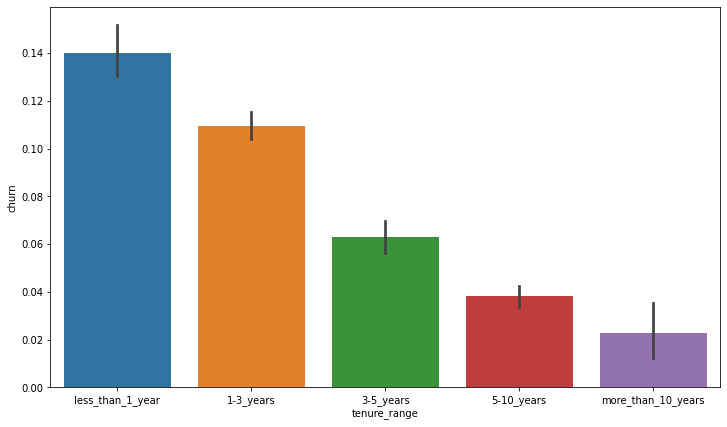

In [435]:
# Plotting a bar plot for tenure range

plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=df_high_value_cust)
plt.show()

#### Conclusion from the above:-
* Maximum churn happens within a year and as the customer tenure with the network increases ,less is the churn rate of the customer meaning more satisfied customers and the company should focus on customers who are less than a year to lure them with better offers.

In [436]:
df_high_value_cust.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [437]:
df_high_value_cust.shape

(30011, 142)

### b. Total minutes of usage

In [438]:
# Creating a total mou instead of offnet and onnet columns

df_high_value_cust['total_mou_6'] = df_high_value_cust['onnet_mou_6'] + df_high_value_cust['offnet_mou_6']
df_high_value_cust['total_mou_7'] = df_high_value_cust['onnet_mou_7'] + df_high_value_cust['offnet_mou_7']
df_high_value_cust['total_mou_8'] = df_high_value_cust['onnet_mou_8'] + df_high_value_cust['offnet_mou_8']

# Dropping the redundant columns
df_high_value_cust.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

df_high_value_cust.head()

arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7   1069.180  1349.850  3171.480          16.23          33.49          31.64   
8    378.721   492.223   137.362           0.00           0.00           0.00   
13   492.846   205.671   593.260          23.53         144.24          72.11   
16   430.975   299.869   187.894           0.00           2.83           0.00   
17   690.008    18.980    25.499           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0.00   

    std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
7               6.66             20.08             16.68         60.86   
8               0.00              0.00              0.00        130.26   
13              0.00              0.00              0.00        701.78   
16              0.00              0.00              0.00         30.89   
17              0.00              0.00              0.00       1148.46   

    std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
7          75.14         77.84           0.0          0.18         10.01   
8         143.48         98.28           0.0          0.00          0.00   
13        138.93        655.18           0.0          0.00          1.29   
16         67.09         21.53           0.0          0.00          0.00   
17    

In [439]:
df_high_value_cust.shape

(30011, 139)

### c. Good phase average 

In [440]:
# Seperate columns for 6th and 7th month

cols_for_6_7 = [col[:-2] for col in df_high_value_cust.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(cols_for_6_7):
    df_high_value_cust[f'good_ph_{col}'] = ( df_high_value_cust[f'{col}_6'] + df_high_value_cust[f'{col}_7'] ) / 2
    df_high_value_cust.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
df_high_value_cust.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
7   3171.480          31.64          38.06             40.28   
8    137.362           0.00           0.00             12.49   
13   593.260          72.11           1.44             36.01   
16   187.894           0.00           0.00             67.38   
17    25.499           4.81          13.34              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
13            294.46             23.51              0.49        353.99   
16            128.28             10.26              0.00        205.93   
17              0.00              0.00              0.00          0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
13            498.23            156.94              0.00        655.18   
16              3.23             18.29              0.00         21.53   
17              0.00              0.00              0.00          0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
7          10.01          6.50          0.0          350.16             27.31   
8           0.00         10.23          0.0          171.56              0.31   
13          1.29          4.78          0.0         1015.26             52.58   
16          0.00          5.91          0.0          233.38             28.89   
17          0.00          0.00          0.0            0.00              0.00   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
13            195.18              7.49        255.26            154.58   
16            150.16             32.71        211.78              6.33   
17              0.00              0.00          0.00              0.00   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
13            317.91              1.91        474.41         1144.53   
16             73.93              2.18         82.44          294.46   
17              0.00              0.00          0.00            0.00   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
13           0.0        393.39        21.44                11   
16           0.0          0.23         0.00                 2   
17           0.0          0.00         0.00                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
13               717             130                   0                3.0   
16               160             130                 130                0.0   
17                30              30                   0                0.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
13             23.0              3.0              0.0                69.0   
16              0.0              0.0              0.0                 0.0   
17              0.0              0.0              0.0                 0.0   

    vol_2g_mb_8  vol_3g_mb_8  monthly

In [441]:
df_high_value_cust.shape


(30011, 95)

### d. Vbc phase average

In [442]:
# Averaging the vbc columns as they are missed out due to no number of month suffix

df_high_value_cust['good_ph_vbc_3g'] = ( df_high_value_cust['jun_vbc_3g'] + df_high_value_cust['jul_vbc_3g'] ) / 2

# Dropping redundant column

df_high_value_cust.drop(['jun_vbc_3g', 'jul_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Renaming the august column for vbc to vbc_3g_8

df_high_value_cust['vbc_3g_8'] = df_high_value_cust['aug_vbc_3g']
df_high_value_cust.drop('aug_vbc_3g', axis=1, inplace=True)

df_high_value_cust.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
7   3171.480          31.64          38.06             40.28   
8    137.362           0.00           0.00             12.49   
13   593.260          72.11           1.44             36.01   
16   187.894           0.00           0.00             67.38   
17    25.499           4.81          13.34              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
13            294.46             23.51              0.49        353.99   
16            128.28             10.26              0.00        205.93   
17              0.00              0.00              0.00          0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
13            498.23            156.94              0.00        655.18   
16              3.23             18.29              0.00         21.53   
17              0.00              0.00              0.00          0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
7          10.01          6.50          0.0          350.16             27.31   
8           0.00         10.23          0.0          171.56              0.31   
13          1.29          4.78          0.0         1015.26             52.58   
16          0.00          5.91          0.0          233.38             28.89   
17          0.00          0.00          0.0            0.00              0.00   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
13            195.18              7.49        255.26            154.58   
16            150.16             32.71        211.78              6.33   
17              0.00              0.00          0.00              0.00   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
13            317.91              1.91        474.41         1144.53   
16             73.93              2.18         82.44          294.46   
17              0.00              0.00          0.00            0.00   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
13           0.0        393.39        21.44                11   
16           0.0          0.23         0.00                 2   
17           0.0          0.00         0.00                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
13               717             130                   0                3.0   
16               160             130                 130                0.0   
17                30              30                   0                0.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
13             23.0              3.0              0.0                69.0   
16              0.0              0.0              0.0                 0.0   
17              0.0              0.0              0.0                 0.0   

    vol_2g_mb_8  vol_3g_mb_8  monthly

In [443]:
df_high_value_cust.shape

(30011, 93)

In [444]:
# Resetting the index 

df_high_value_cust.reset_index(inplace=True, drop=True)

df_high_value_cust.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
0  3171.480          31.64          38.06             40.28            162.28   
1   137.362           0.00           0.00             12.49             50.54   
2   593.260          72.11           1.44             36.01            294.46   
3   187.894           0.00           0.00             67.38            128.28   
4    25.499           4.81          13.34              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
0             53.23              0.00        255.79             12.01   
1              0.00              7.15         63.04             22.58   
2             23.51              0.49        353.99            498.23   
3             10.26              0.00        205.93              3.23   
4              0.00              0.00          0.00              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
0             49.14             16.68         77.84         10.01   
1             75.69              0.00         98.28          0.00   
2            156.94              0.00        655.18          1.29   
3             18.29              0.00         21.53          0.00   
4              0.00              0.00          0.00          0.00   

   spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          6.50          0.0          350.16             27.31   
1         10.23          0.0          171.56              0.31   
2          4.78          0.0         1015.26             52.58   
3          5.91          0.0          233.38             28.89   
4          0.00          0.0            0.00              0.00   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0            121.19             39.53        188.04             30.39   
1             15.48              0.00         15.79              0.10   
2            195.18              7.49        255.26            154.58   
3            150.16             32.71        211.78              6.33   
4              0.00              0.00          0.00              0.00   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0            141.33             22.21        193.94          428.74   
1              0.65              0.00          0.75           16.54   
2            317.91              1.91        474.41         1144.53   
3             73.93              2.18         82.44          294.46   
4              0.00              0.00          0.00            0.00   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0           0.0         31.59        15.14                 7   
1           0.0          0.00         0.00                14   
2           0.0        393.39        21.44                11   
3           0.0          0.23         0.00                 2   
4           0.0          0.00         0.00                 4   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0              3638            1580                 779                0.0   
1               120              30                  10                3.0   
2               717             130                   0                3.0   
3               160             130                 130                0.0   
4                30              30                   0                0.0   

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0              0.0              0.0              0.0                 0.0   
1             23.0              3.0              0.0                69.0   
2             23.0              3.0              0.0                69.0   
3              0.0              0.0              0.0                 0.0   
4              0.0              0.0              0.0                 0.0   

   vol_2g_mb_8  vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0         0.00    

## EDA

In [445]:
df_high_value_cust.dtypes

arpu_8                       float64
roam_ic_mou_8                float64
roam_og_mou_8                float64
loc_og_t2t_mou_8             float64
loc_og_t2m_mou_8             float64
loc_og_t2f_mou_8             float64
loc_og_t2c_mou_8             float64
loc_og_mou_8                 float64
std_og_t2t_mou_8             float64
std_og_t2m_mou_8             float64
std_og_t2f_mou_8             float64
std_og_mou_8                 float64
isd_og_mou_8                 float64
spl_og_mou_8                 float64
og_others_8                  float64
total_og_mou_8               float64
loc_ic_t2t_mou_8             float64
loc_ic_t2m_mou_8             float64
loc_ic_t2f_mou_8             float64
loc_ic_mou_8                 float64
std_ic_t2t_mou_8             float64
std_ic_t2m_mou_8             float64
std_ic_t2f_mou_8             float64
std_ic_mou_8                 float64
total_ic_mou_8               float64
spl_ic_mou_8                 float64
isd_ic_mou_8                 float64
i

In [446]:
# Defining function for boxplots for Good and Action phase

def plot_box_chart(attribute):
    plt.figure(figsize=(12,8))
    df = df_high_value_cust
    plt.subplot(2,2,1)
    sns.boxplot(data=df, y="good_ph_"+attribute,x="churn",hue="churn",showfliers=False)

    plt.subplot(2,2,2)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",showfliers=False)
    plt.show()

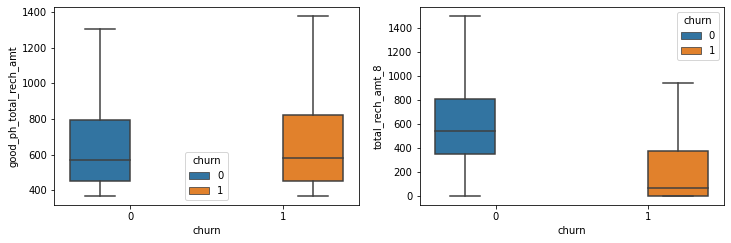

In [447]:
# total recharge amount:

plot_box_chart('total_rech_amt')

In [448]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_total_rech_amt','total_rech_amt_8','churn']].groupby('churn').median()

good_ph_total_rech_amt  total_rech_amt_8
churn                                          
0                       567.5             544.0
1                       583.0              62.0

In [449]:
# Conclusion from the above figure and table :
# Drop of total recharge amount for the churned customers in the action phase compared to good phase

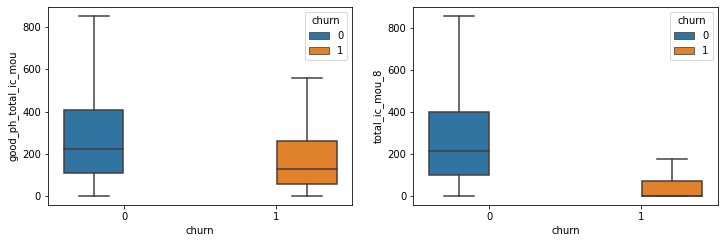

In [450]:
# total incoming minutes of usage:

plot_box_chart('total_ic_mou')

In [451]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_total_ic_mou','total_ic_mou_8','churn']].groupby('churn').median()

good_ph_total_ic_mou  total_ic_mou_8
churn                                      
0                  220.3275          212.36
1                  127.0250            0.00

In [452]:
# Conclusion from the above figure and table :
# Total incoming minutes of usage is '0' for the churned customers in the action phase compared to good phase

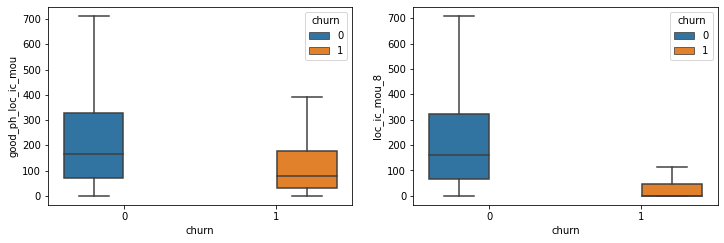

In [453]:
# local incoming minutes of usage:

plot_box_chart('loc_ic_mou')

In [454]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_loc_ic_mou','loc_ic_mou_8','churn']].groupby('churn').median()

good_ph_loc_ic_mou  loc_ic_mou_8
churn                                  
0                 166.305       160.235
1                  77.050         0.000

In [455]:
# Conclusion from the above figure and table :
# Local incoming minutes of usage is '0' for the churned customers in the action phase compared to good phase

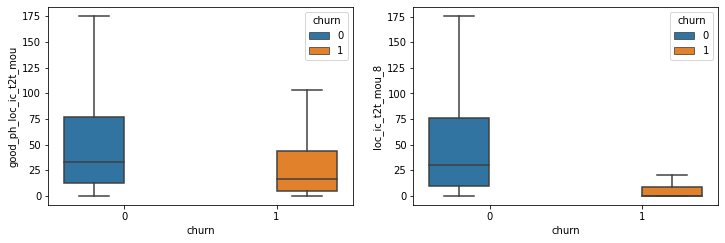

In [456]:
# local incoming within the same network minutes of usage:

plot_box_chart('loc_ic_t2t_mou')

In [457]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_loc_ic_t2t_mou','loc_ic_t2t_mou_8','churn']].groupby('churn').median()

good_ph_loc_ic_t2t_mou  loc_ic_t2t_mou_8
churn                                          
0                      33.440             30.39
1                      16.785              0.00

In [458]:
# Conclusion from the above figure and table :
# Local incoming within the same operator minutes of usage is '0' for the churned customers in the action phase compared to good phase

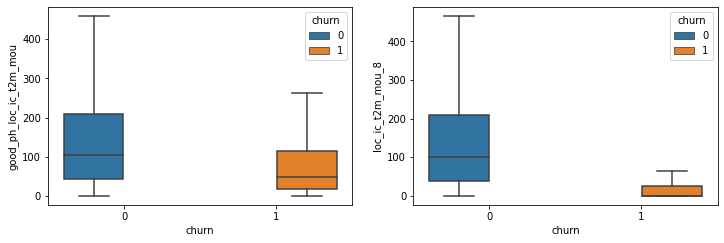

In [459]:
# local incoming from operator T to other operator mobile minutes of usage:
 
plot_box_chart('loc_ic_t2m_mou')

In [460]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_loc_ic_t2m_mou','loc_ic_t2m_mou_8','churn']].groupby('churn').median()

good_ph_loc_ic_t2m_mou  loc_ic_t2m_mou_8
churn                                          
0                    103.9525            100.85
1                     49.1150              0.00

In [461]:
# Conclusion from the above figure and table :
# Local incoming from operator T to other operator mobile minutes of usage is '0' for the churned customers in the action phase compared to good phase

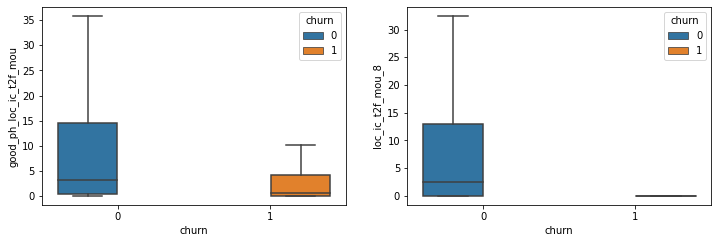

In [462]:
# local incoming from operator T to fixed lines of T minutes of usage:
 
plot_box_chart('loc_ic_t2f_mou')

In [463]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_loc_ic_t2f_mou','loc_ic_t2f_mou_8','churn']].groupby('churn').median()

good_ph_loc_ic_t2f_mou  loc_ic_t2f_mou_8
churn                                          
0                       3.220              2.46
1                       0.465              0.00

In [464]:
# Conclusion from the above figure and table :
# Local incoming from operator T to fixed lines minutes of usage is '0' for the churned customers in the action phase compared to good phase

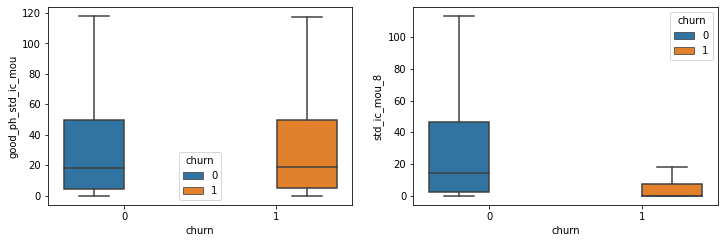

In [465]:
# STD incoming calls minutes of usage:
 
plot_box_chart('std_ic_mou')

In [466]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_std_ic_mou','std_ic_mou_8','churn']].groupby('churn').median()

good_ph_std_ic_mou  std_ic_mou_8
churn                                  
0                  18.220         14.41
1                  19.035          0.00

In [467]:
# Conclusion from the above figure and table :
# Similar to Local incoming mou, STD incoming call is reduced from good phase and is '0' for the churned customers in the action phase compared to good phase

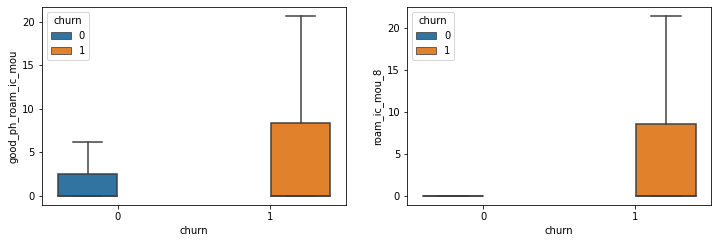

In [468]:
# Roaming incoming calls minutes of usage:
 
plot_box_chart('roam_ic_mou')

In [469]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_roam_ic_mou','roam_ic_mou_8','churn']].groupby('churn').mean()

good_ph_roam_ic_mou  roam_ic_mou_8
churn                                    
0                14.048043      11.856034
1                30.475922      28.062156

In [470]:
# Conclusion from the above figure and table :
# Roaming incoming mou for churned customers is more than the non churned customers signifying the churned customers have moved out of the country and using the roaming services.

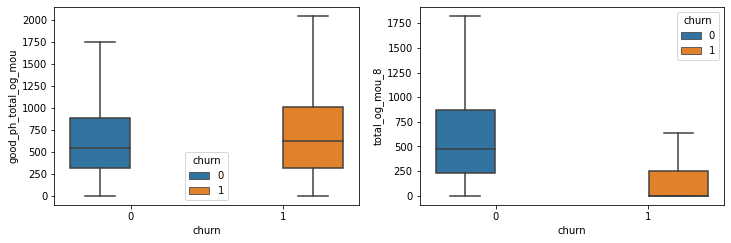

In [471]:
# total outgoing minutes of usage:

plot_box_chart('total_og_mou')

In [472]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_total_og_mou','total_og_mou_8','churn']].groupby('churn').median()

good_ph_total_og_mou  total_og_mou_8
churn                                      
0                  540.5125         470.475
1                  624.7800           0.000

In [473]:
# Conclusion from the above figure and table :
# total outgoing minutes of usage is '0' for the churned customers in the action phase compared to good phase

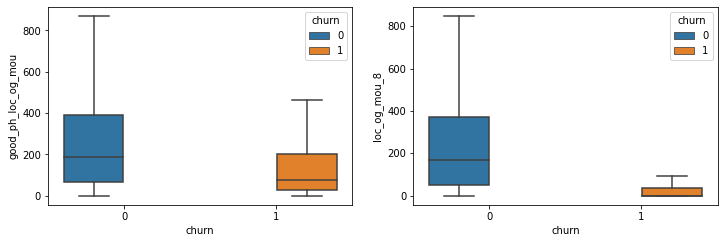

In [474]:
# local outgoing minutes of usage:

plot_box_chart('loc_og_mou')

In [475]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_loc_og_mou','loc_og_mou_8','churn']].groupby('churn').median()

good_ph_loc_og_mou  loc_og_mou_8
churn                                  
0                188.2175        168.89
1                 77.1100          0.00

In [476]:
# Conclusion from the above figure and table :
# local outgoing minutes of usage is '0' for the churned customers in the action phase compared to good phase

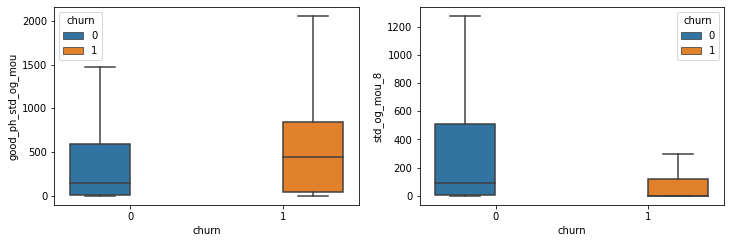

In [477]:
# STD outgoing minutes of usage:

plot_box_chart('std_og_mou')

In [478]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_std_og_mou','std_og_mou_8','churn']].groupby('churn').median()

good_ph_std_og_mou  std_og_mou_8
churn                                  
0                146.4125         88.24
1                440.6200          0.00

In [479]:
# Conclusion from the above figure and table :
# STD outgoing minutes of usage is '0' for the churned customers in the action phase compared to good phase
# The STD outgoing calls have significantly reduced from the good phase in the action phase

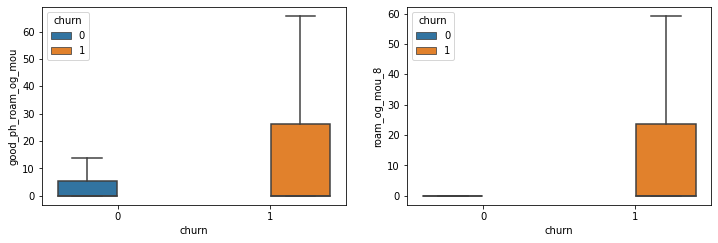

In [480]:
# Roaming outgoing minutes of usage:

plot_box_chart('roam_og_mou')

In [481]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_roam_og_mou','roam_og_mou_8','churn']].groupby('churn').mean()

good_ph_roam_og_mou  roam_og_mou_8
churn                                    
0                23.079188      19.104592
1                53.167013      46.473051

In [482]:
# Conclusion from the above figure and table :
# Roaming outgoing mou for churned customers is more than the non churned customers signifying the churned customers have moved out of the country and using the roaming services.

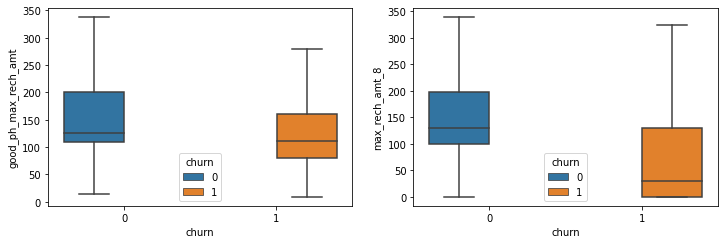

In [483]:
# Maximum recharge amount for data:
plot_box_chart('max_rech_amt')

In [484]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_max_rech_amt','max_rech_amt_8','churn']].groupby('churn').median()

good_ph_max_rech_amt  max_rech_amt_8
churn                                      
0                     125.0           130.0
1                     110.5            30.0

In [485]:
# Conclusion from the above figure and table :
# Maximum recharge amnount has significantly reduced for the churned customers in the action phase compared to good phase


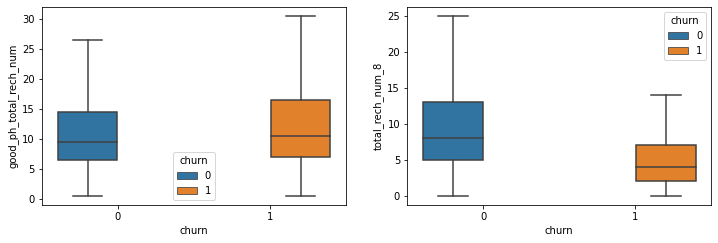

In [486]:
# total recharge for Number:
plot_box_chart('total_rech_num')

In [487]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_total_rech_num','total_rech_num_8','churn']].groupby('churn').median()

good_ph_total_rech_num  total_rech_num_8
churn                                          
0                         9.5               8.0
1                        10.5               4.0

In [488]:
# Conclusion:
# Drop of total recharge number for the churned customers in the action phase compared to good phase

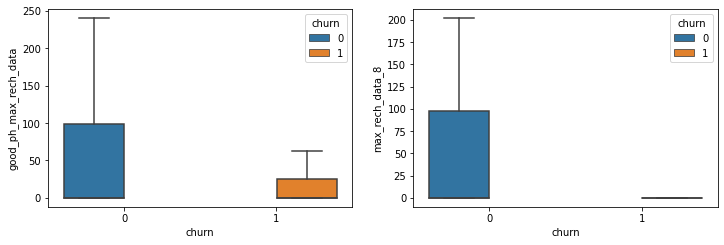

In [489]:
# maximum recharge for data:
plot_box_chart('max_rech_data')

In [490]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_max_rech_data','max_rech_data_8','churn']].groupby('churn').mean()

good_ph_max_rech_data  max_rech_data_8
churn                                        
0                  59.548709        59.124407
1                  39.245469        14.376012

In [491]:
# Conclusion:
# Maximum recharge data for the churned customers is reducing in the action phase compared to good phase

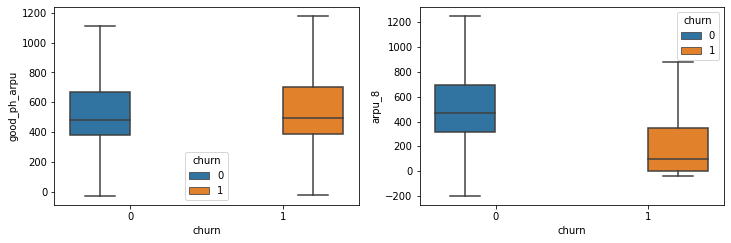

In [492]:
# Average revenue per usage
plot_box_chart('arpu')

In [493]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_vol_2g_mb','vol_2g_mb_8','churn']].groupby('churn').mean()

good_ph_vol_2g_mb  vol_2g_mb_8
churn                                
0              80.747135    74.309036
1              54.914990    15.283185

In [494]:
# Conclusion:
# Arpu for churn customers in action phase is dropping compared to good phase

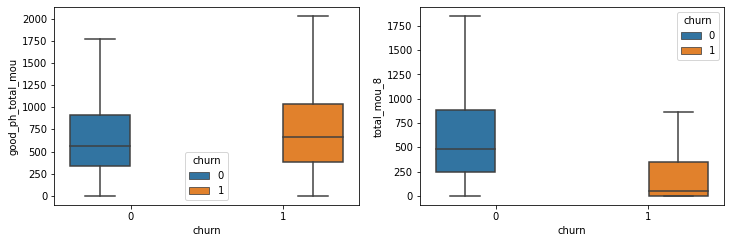

In [495]:
# Total mou(Onnet+offnet)
plot_box_chart('total_mou')

In [496]:
# Numbers against 'Churn' table

df_high_value_cust[['good_ph_total_mou','total_mou_8','churn']].groupby('churn').median()

good_ph_total_mou  total_mou_8
churn                                
0               558.7975       486.17
1               667.2850        51.08

In [497]:
# Conclusion:
# Total mou for churn customers in action phase is significantly dropping compared to good phase

In [498]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,6),rot=0)
    plt.show()
    
    return mean_bar

In [499]:
# Monthly 2G/3G services

monthly_subcription_2g_3g= df_high_value_cust.columns[df_high_value_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_8', 'monthly_3g_8', 'good_ph_monthly_2g', 'good_ph_monthly_3g']

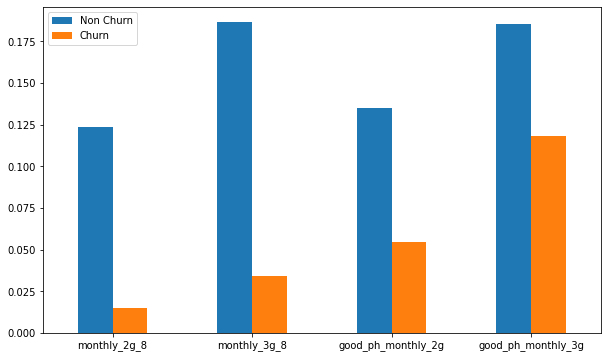

monthly_2g_8  monthly_3g_8  good_ph_monthly_2g  good_ph_monthly_3g
Non Churn      0.123423      0.186374            0.135039            0.185316
Churn          0.015040      0.033938            0.054763            0.118203

In [500]:
plot_mean_bar_chart(df_high_value_cust, monthly_subcription_2g_3g)

In [501]:
# Conclusion:-
# Monthly subscription for churned customers is dropping in action phase compared to the good phase

In [502]:
# Sachet 2G|3G

sachet_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
sachet_cols.tolist()

['sachet_2g_8', 'sachet_3g_8', 'good_ph_sachet_2g', 'good_ph_sachet_3g']

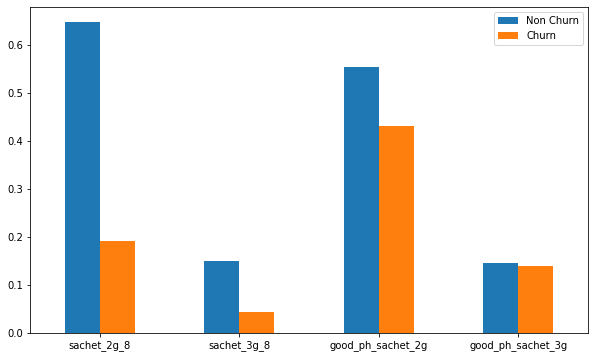

sachet_2g_8  sachet_3g_8  good_ph_sachet_2g  good_ph_sachet_3g
Non Churn     0.647057      0.14950           0.554526           0.144558
Churn         0.190513      0.04435           0.430197           0.138835

In [503]:
plot_mean_bar_chart(df_high_value_cust, sachet_cols)

In [504]:
# Conclusion:-
# Service schemes with validity smaller than a month for churned customers is dropping in action month compared to the good phase

In [505]:
# Volume 2G|3G

vol_sg_3g_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('vol_2g_mb|vol_3g_mb',regex=True)]
vol_sg_3g_cols.tolist()

['vol_2g_mb_8', 'vol_3g_mb_8', 'good_ph_vol_2g_mb', 'good_ph_vol_3g_mb']

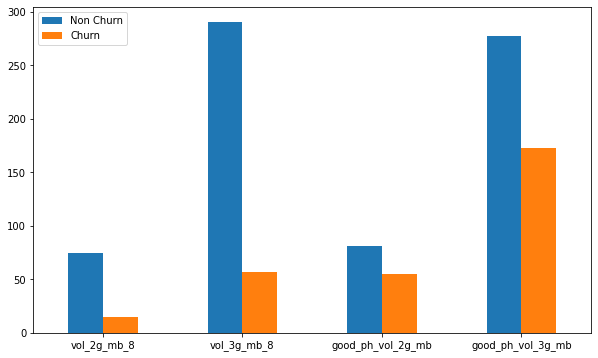

vol_2g_mb_8  vol_3g_mb_8  good_ph_vol_2g_mb  good_ph_vol_3g_mb
Non Churn    74.309036    290.01639          80.747135         277.245448
Churn        15.283185     56.77688          54.914990         173.054857

In [506]:
plot_mean_bar_chart(df_high_value_cust, vol_sg_3g_cols)

In [507]:
# Conclusion:-
# Mobile internet usage of 2G & 3G service for churned customers is dropping in action month compared to the good phase

In [508]:
# Volume based cost for paid as per usage

vbc_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_cols.tolist()

['good_ph_vbc_3g', 'vbc_3g_8']

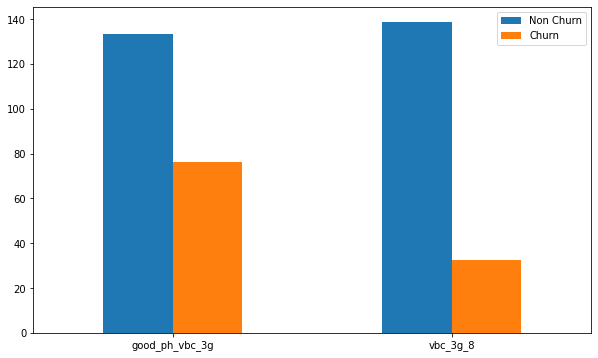

good_ph_vbc_3g    vbc_3g_8
Non Churn      133.151174  138.597023
Churn           76.354240   32.610659

In [509]:
plot_mean_bar_chart(df_high_value_cust, vbc_cols)

In [510]:
# Conclusion:-
# Volume based cost for paid as per usagee for churned customers is dropping in action month compared to the good phase

In [511]:
# Volume based cost for paid as per usage

last_day_rech_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('last_day_rch_amt',regex=True)]
last_day_rech_cols.tolist()

['last_day_rch_amt_8', 'good_ph_last_day_rch_amt']

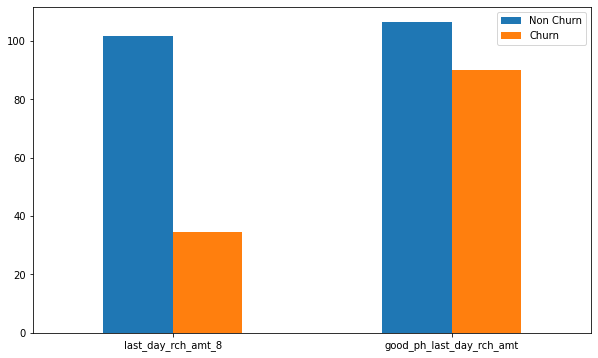

last_day_rch_amt_8  good_ph_last_day_rch_amt
Non Churn          101.440514                106.287603
Churn               34.460085                 90.070189

In [512]:
plot_mean_bar_chart(df_high_value_cust, last_day_rech_cols)

In [513]:
# Conclusion:-
# Last day recharge amount for churned customers is dropping in action month compared to the good phase

In [514]:
# Count recharge 2g and 3g

count_rech_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('count_rech_',regex=True)]
count_rech_cols.tolist()

['count_rech_2g_8',
 'count_rech_3g_8',
 'good_ph_count_rech_2g',
 'good_ph_count_rech_3g']

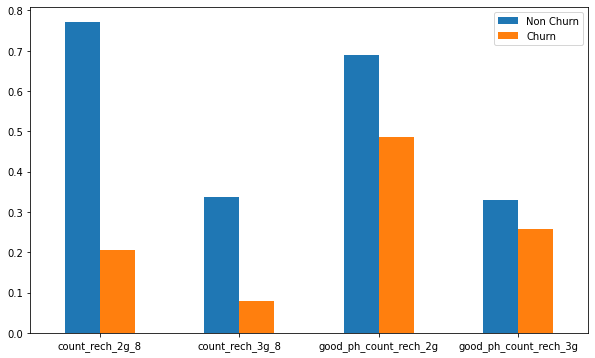

count_rech_2g_8  count_rech_3g_8  good_ph_count_rech_2g  \
Non Churn         0.770479         0.335874               0.689565   
Churn             0.205553         0.078288               0.484960   

           good_ph_count_rech_3g  
Non Churn               0.329875  
Churn                   0.257038

In [515]:
plot_mean_bar_chart(df_high_value_cust, count_rech_cols)

In [516]:
# Conclusion:-
# Count of 2G & 3G for churned customers is dropping in action month compared to the good phase

In [517]:
# Dropping tenure_range since we have tenure already and columns are highly correlated


df_high_value_cust.drop('tenure_range', axis=1, inplace=True)

In [518]:
df_high_value_cust.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
0  3171.480          31.64          38.06             40.28            162.28   
1   137.362           0.00           0.00             12.49             50.54   
2   593.260          72.11           1.44             36.01            294.46   
3   187.894           0.00           0.00             67.38            128.28   
4    25.499           4.81          13.34              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
0             53.23              0.00        255.79             12.01   
1              0.00              7.15         63.04             22.58   
2             23.51              0.49        353.99            498.23   
3             10.26              0.00        205.93              3.23   
4              0.00              0.00          0.00              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
0             49.14             16.68         77.84         10.01   
1             75.69              0.00         98.28          0.00   
2            156.94              0.00        655.18          1.29   
3             18.29              0.00         21.53          0.00   
4              0.00              0.00          0.00          0.00   

   spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          6.50          0.0          350.16             27.31   
1         10.23          0.0          171.56              0.31   
2          4.78          0.0         1015.26             52.58   
3          5.91          0.0          233.38             28.89   
4          0.00          0.0            0.00              0.00   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0            121.19             39.53        188.04             30.39   
1             15.48              0.00         15.79              0.10   
2            195.18              7.49        255.26            154.58   
3            150.16             32.71        211.78              6.33   
4              0.00              0.00          0.00              0.00   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0            141.33             22.21        193.94          428.74   
1              0.65              0.00          0.75           16.54   
2            317.91              1.91        474.41         1144.53   
3             73.93              2.18         82.44          294.46   
4              0.00              0.00          0.00            0.00   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0           0.0         31.59        15.14                 7   
1           0.0          0.00         0.00                14   
2           0.0        393.39        21.44                11   
3           0.0          0.23         0.00                 2   
4           0.0          0.00         0.00                 4   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0              3638            1580                 779                0.0   
1               120              30                  10                3.0   
2               717             130                   0                3.0   
3               160             130                 130                0.0   
4                30              30                   0                0.0   

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0              0.0              0.0              0.0                 0.0   
1             23.0              3.0              0.0                69.0   
2             23.0              3.0              0.0                69.0   
3              0.0              0.0              0.0                 0.0   
4              0.0              0.0              0.0                 0.0   

   vol_2g_mb_8  vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0         0.00    

In [519]:
df_high_value_cust.shape

(30011, 92)

In [520]:
numerical_cols = df_high_value_cust.dtypes[(df_high_value_cust.dtypes == "float64") | (df_high_value_cust.dtypes == "int64")].index.to_list()
numerical_cols.remove('churn')

Text(0.5, 1.0, 'Checking Correlation matrix ')

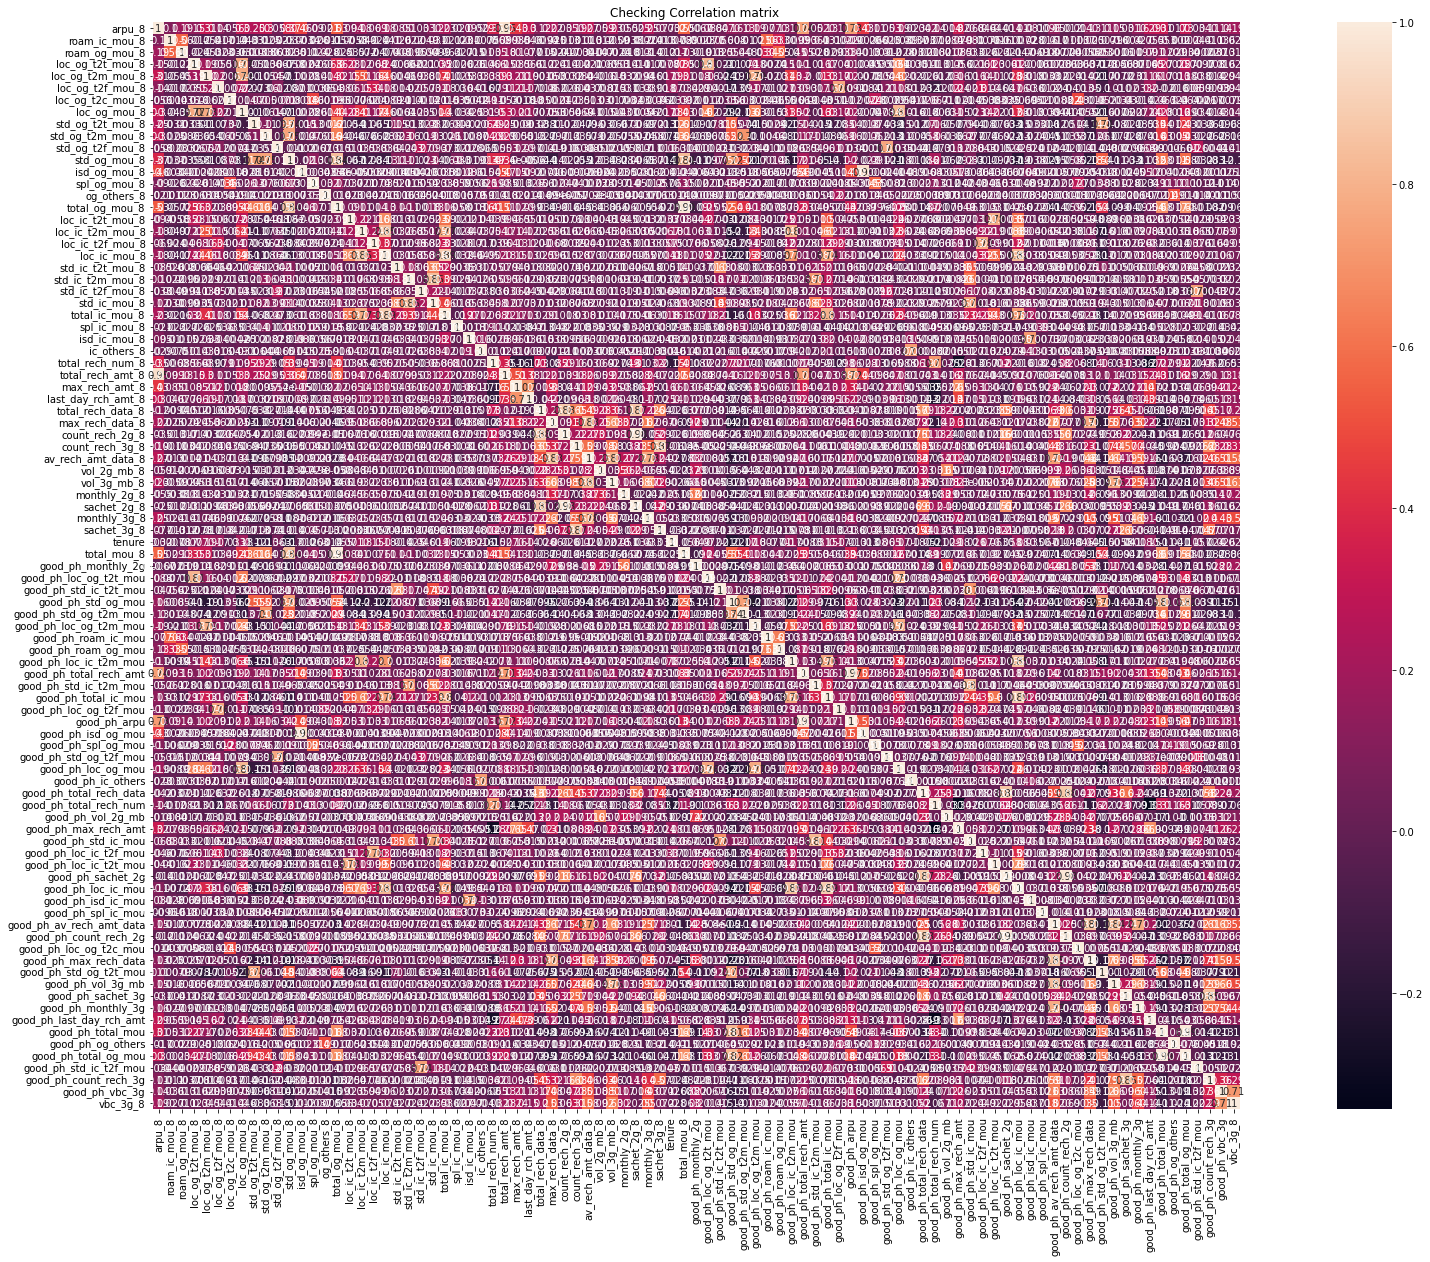

In [521]:
# Heatmap of all the numerical variables in the dataset

corr_vars = df_high_value_cust[numerical_cols].corr()
f, ax = plt.subplots(figsize=(35, 20))
sns.heatmap(corr_vars, vmax=1, square=True, annot= True);
plt.title("Checking Correlation matrix ")

In [522]:
# Defining below function to also find the highly correlated variables with a thresold of 0.7 in the dataset

threshold = 0.7

def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [523]:
high_cor_function(df_high_value_cust)

max corr: 0.987966059238263 , min corr:  -0.34364599301404697


total_og_mou_8            total_mou_8                 0.987966
good_ph_total_mou         good_ph_total_og_mou        0.987898
count_rech_2g_8           sachet_2g_8                 0.981607
good_ph_sachet_2g         good_ph_count_rech_2g       0.980082
good_ph_total_rech_amt    good_ph_arpu                0.974452
total_rech_amt_8          arpu_8                      0.953725
isd_og_mou_8              good_ph_isd_og_mou          0.949056
good_ph_total_ic_mou      good_ph_loc_ic_mou          0.892194
total_ic_mou_8            loc_ic_mou_8                0.889933
total_rech_data_8         count_rech_2g_8             0.881800
good_ph_total_rech_data   good_ph_count_rech_2g       0.878470
total_rech_data_8         sachet_2g_8                 0.872518
good_ph_total_rech_data   good_ph_sachet_2g           0.866662
sachet_3g_8               count_rech_3g_8             0.865350
loc_ic_mou_8              loc_ic_t2m_mou_8            0.853509
good_ph_count_rech_3g     good_ph_sachet_3g           0

In [524]:
# Dropping highly correlated variables

df_high_value_cust=df_high_value_cust.drop(["total_mou_8", "good_ph_total_mou","sachet_2g_8","good_ph_count_rech_2g","good_ph_total_rech_amt","total_rech_amt_8","isd_og_mou_8","good_ph_total_ic_mou","loc_ic_mou_8","total_rech_data_8","good_ph_count_rech_2g","sachet_2g_8","good_ph_sachet_2g","count_rech_3g_8","loc_ic_t2m_mou_8","good_ph_sachet_3g","good_ph_max_rech_data","good_ph_loc_ic_t2m_mou","std_ic_mou_8","total_og_mou_8","total_mou_8","good_ph_vol_3g_mb","av_rech_amt_data_8","loc_ic_mou_8","good_ph_total_og_mou","good_ph_std_ic_mou","good_ph_loc_og_mou","good_ph_total_mou","good_ph_loc_og_t2t_mou","av_rech_amt_data_8","good_ph_total_ic_mou","good_ph_loc_ic_t2m_mou","good_ph_loc_og_t2m_mou","loc_ic_t2t_mou_8","loc_ic_t2f_mou_8","av_rech_amt_data_8","loc_og_t2m_mou_8","good_ph_monthly_3g","good_ph_loc_og_t2m_mou","loc_ic_t2m_mou_8","loc_og_mou_8","good_ph_loc_og_mou","vol_3g_mb_8","loc_og_t2f_mou_8","std_og_t2f_mou_8","good_ph_loc_ic_t2m_mou","max_rech_data_8","std_og_mou_8","good_ph_std_og_t2t_mou","std_og_t2t_mou_8","good_ph_std_og_t2m_mou","good_ph_std_ic_t2f_mou","good_ph_total_rech_amt","good_ph_std_ic_mou","loc_ic_mou_8","arpu_8","good_ph_std_og_mou","ic_others_8","good_ph_av_rech_amt_data","total_rech_amt_8","good_ph_std_og_mou","isd_ic_mou_8","total_ic_mou_8","total_rech_amt_8","vbc_3g_8","std_ic_t2m_mou_8","good_ph_total_rech_num","good_ph_std_og_t2m_mou","good_ph_loc_ic_t2m_mou"],axis=1)


In [525]:
df_high_value_cust.shape

(30011, 44)

In [526]:
df_high_value_cust.head()

roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2c_mou_8  \
0          31.64          38.06             40.28              0.00   
1           0.00           0.00             12.49              7.15   
2          72.11           1.44             36.01              0.49   
3           0.00           0.00             67.38              0.00   
4           4.81          13.34              0.00              0.00   

   std_og_t2m_mou_8  spl_og_mou_8  og_others_8  std_ic_t2t_mou_8  \
0             49.14          6.50          0.0             30.39   
1             75.69         10.23          0.0              0.10   
2            156.94          4.78          0.0            154.58   
3             18.29          5.91          0.0              6.33   
4              0.00          0.00          0.0              0.00   

   std_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  \
0             22.21           0.0                 7            1580   
1              0.00           0.0                14              30   
2              1.91           0.0                11             130   
3              2.18           0.0                 2             130   
4              0.00           0.0                 4              30   

   last_day_rch_amt_8  count_rech_2g_8  vol_2g_mb_8  monthly_2g_8  \
0                 779              0.0         0.00             0   
1                  10              3.0         0.03             0   
2                   0              3.0         0.02             0   
3                 130              0.0         0.00             0   
4                   0              0.0         0.00             0   

   monthly_3g_8  sachet_3g_8  churn  tenure  good_ph_monthly_2g  \
0             0            0      1    27.0                 0.0   
1             0            0      0    10.0                 0.5   
2             0            0      0    87.0                 0.0   
3             0            0      0    17.0                 0.0   
4             0            0      0    22.0                 0.0   

   good_ph_std_ic_t2t_mou  good_ph_roam_ic_mou  good_ph_roam_og_mou  \
0                  24.360               24.860               18.165   
1                   0.290                0.000                0.000   
2                  76.985               83.885               21.620   
3                  73.715                1.415                8.870   
4                   4.315                2.380                4.230   

   good_ph_std_ic_t2m_mou  good_ph_loc_og_t2f_mou  good_ph_arpu  \
0                 109.215                  58.635     1209.5150   
1                  13.255                   0.000      435.4720   
2                 168.960                   2.270      349.2585   
3                  45.880                   2.240      365.4220   
4                   0.640                   0.000      354.4940   

   good_ph_isd_og_mou  good_ph_spl_og_mou  good_ph_std_og_t2f_mou  \
0                0.09                2.25                   13.37   
1                0.00                0.00                    0.00   
2                0.00                0.00                    0.00   
3                0.00                1.63                    0.00   
4                0.00                1.29                    0.00   

   good_ph_ic_others  good_ph_total_rech_data  good_ph_vol_2g_mb  \
0             15.465                      0.0                0.0   
1              0.000                      1.0              178.0   
2             49.860                      0.0                0.0   
3              0.000                      0.0                0.0   
4              0.000                      0.0                0.0   

   good_ph_max_rech_amt  good_ph_loc_ic_t2f_mou  good_ph_loc_ic_t2t_mou  \
0                1185.0                 126.810                  45.200   
1                 122.0                   0.000                  16.840   
2                 110.0                   2

## Outliers Check and treatment

In [527]:
df_high_value_cust.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2c_mou_8  \
count    30011.00000   30011.000000      30011.000000      30011.000000   
mean        13.25627      21.469272         87.139995          1.712739   
std         74.55207     106.244774        234.721938          7.397562   
min          0.00000       0.000000          0.000000          0.000000   
25%          0.00000       0.000000          5.790000          0.000000   
50%          0.00000       0.000000         28.640000          0.000000   
75%          0.00000       0.000000         84.670000          0.050000   
95%         62.79500     114.800000        324.145000          9.330000   
99%        288.48500     432.743000        956.502000         28.871000   
max       4169.81000    5337.040000      10752.560000        351.830000   

       std_og_t2m_mou_8  spl_og_mou_8   og_others_8  std_ic_t2t_mou_8  \
count      30011.000000  30011.000000  30011.000000      30011.000000   
mean         179.568790      6.885193      0.027876         15.051559   
std          416.752834     22.893414      3.325433         72.433104   
min            0.000000      0.000000     -1.000000          0.000000   
25%            0.000000      0.000000      0.000000          0.000000   
50%           23.660000      0.490000      0.000000          0.560000   
75%          164.725000      6.380000      0.000000          8.860000   
95%          886.560000     30.230000      0.000000         61.560000   
99%         1905.805000     74.112000      0.000000        215.199000   
max        13950.040000   1390.880000    394.930000       4309.290000   

       std_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  \
count      30011.000000  30011.000000      30011.000000    30011.000000   
mean           2.680925      0.027660         10.225317      162.869348   
std           20.269535      0.116574          9.478572      172.605809   
min            0.000000      0.000000          0.000000        0.000000   
25%            0.000000      0.000000          4.000000       67.000000   
50%            0.000000      0.000000          8.000000      130.000000   
75%            0.130000      0.000000         13.000000      198.000000   
95%           10.980000      0.250000         28.000000      455.000000   
99%           49.409000      0.610000         46.000000      951.000000   
max         1394.890000      6.230000        196.000000     4449.000000   

       last_day_rch_amt_8  count_rech_2g_8   vol_2g_mb_8  monthly_2g_8  \
count        30011.000000     30011.000000  30011.000000  30011.000000   
mean            95.653294         0.721669     69.209105      0.114058   
std            145.260363         1.870910    268.494284      0.357272   
min              0.000000         0.000000      0.000000      0.000000   
25%              0.000000         0.000000      0.000000      0.000000   
50%             50.000000         0.000000      0.000000      0.000000   
75%            130.000000         1.000000      9.620000      0.000000   
95%            252.000000         4.000000    409.905000      1.000000   
99%            619.000000         9.000000   1256.619000      2.000000   
max           4449.000000        44.000000  11117.610000      5.000000   

       monthly_3g_8   sachet_3g_8         churn        tenure  \
count  30011.000000  30011.000000  30011.000000  30011.000000   
mean       0.173203      0.140415      0.086402     42.136117   
std        0.582932      0.974727      0.280961     32.535174   
min        0.000000      0.000000      0.000000      6.000000   
25%        0.000000      0.000000      0.000000     16.000000   
50%        0.000000      0.000000      0.000000     30.000000   
75%        0.000000      0.000000      0.000000     64.000000   
95%        1.000000      1.000000      1.000000    106.000000   
99%        3.000000      3.000000      1.000000    122.000000   
max       16.000000     41.000000      1.000000    144.000000   

       good_ph_month

In [528]:
# There are lot of columns with outliers, while most of them are because the value is 0.0 as the service was not used as seen in the EDA, and some are actual outliers
# Will plot box plot and then treat those outliers

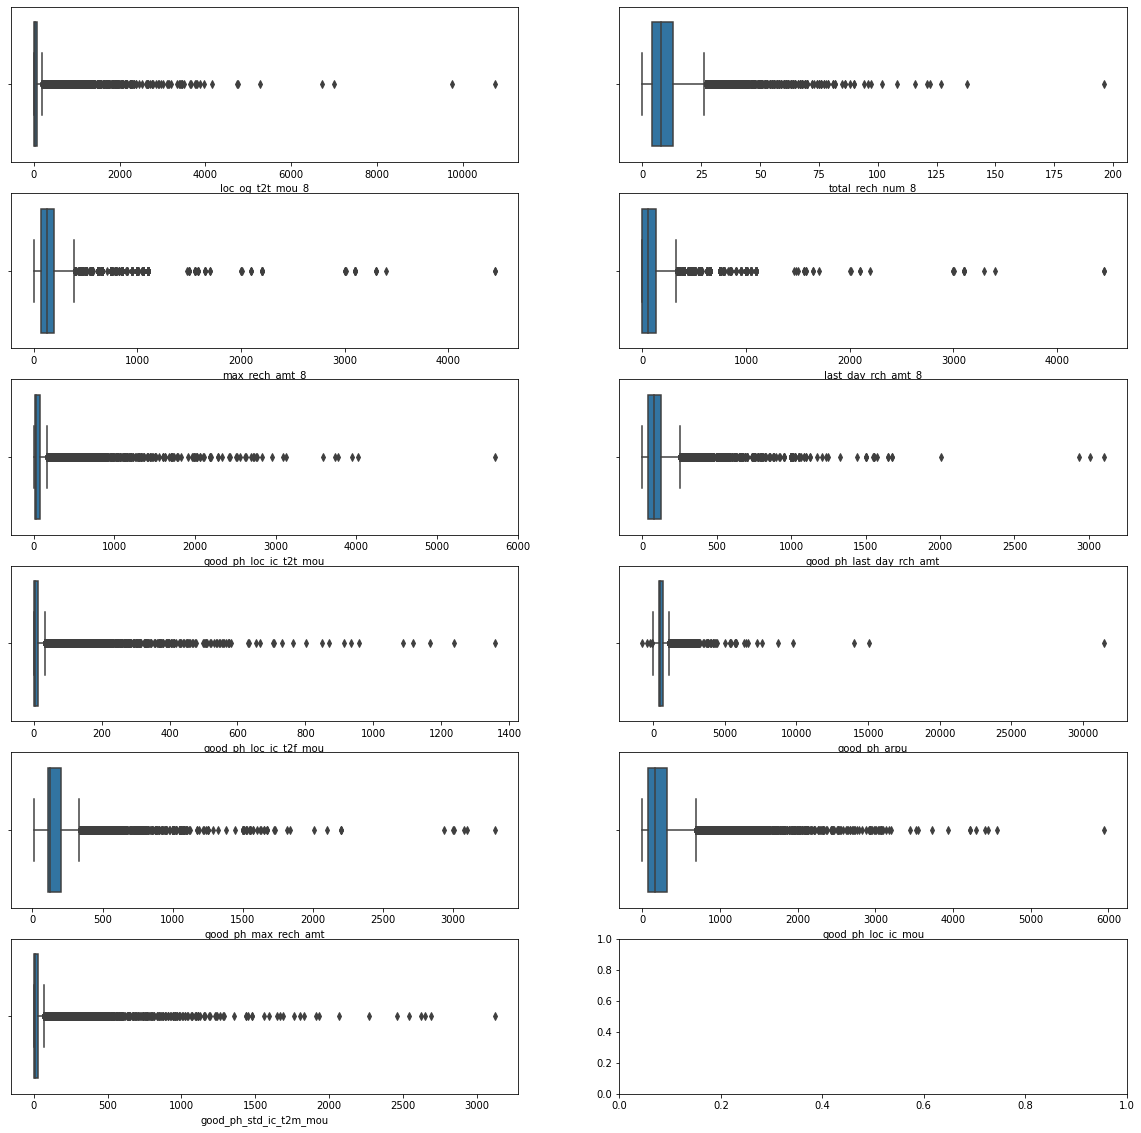

In [529]:
# Based on the describe filtering out the features that need further analysis

# List of features to be analyzed
outliers_cols = ['loc_og_t2t_mou_8','total_rech_num_8','max_rech_amt_8', 'last_day_rch_amt_8', 'good_ph_loc_ic_t2t_mou', 'good_ph_last_day_rch_amt','good_ph_loc_ic_t2f_mou','good_ph_arpu','good_ph_max_rech_amt','good_ph_loc_ic_mou','good_ph_std_ic_t2m_mou']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

for index,col in enumerate(outliers_cols):
    i, j = divmod(index, 2)
    sns.boxplot(df_high_value_cust[col], ax=axes[i, j])
    
plt.show()

In [530]:
# Removing outliers below 10th and above 90th percentile

for col in outliers_cols: 
    Q1 = df_high_value_cust[col].quantile(0.10)
    Q3 = df_high_value_cust[col].quantile(0.90)
    IQR = Q3 - Q1
    df_high_value_cust = df_high_value_cust[(df_high_value_cust[col] >= Q1 - 1.5*IQR) & 
                      (df_high_value_cust[col] <= Q3 + 1.5*IQR)]


In [531]:
df_high_value_cust.shape

(25002, 44)

In [532]:
df_high_value_cust.head()

roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2c_mou_8  \
1           0.00           0.00             12.49              7.15   
2          72.11           1.44             36.01              0.49   
3           0.00           0.00             67.38              0.00   
4           4.81          13.34              0.00              0.00   
5           0.00           0.00             23.34              0.00   

   std_og_t2m_mou_8  spl_og_mou_8  og_others_8  std_ic_t2t_mou_8  \
1             75.69         10.23          0.0              0.10   
2            156.94          4.78          0.0            154.58   
3             18.29          5.91          0.0              6.33   
4              0.00          0.00          0.0              0.00   
5            876.99          0.00          0.0              0.18   

   std_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  \
1              0.00           0.0                14              30   
2              1.91           0.0                11             130   
3              2.18           0.0                 2             130   
4              0.00           0.0                 4              30   
5              0.00           0.0                27              50   

   last_day_rch_amt_8  count_rech_2g_8  vol_2g_mb_8  monthly_2g_8  \
1                  10              3.0         0.03             0   
2                   0              3.0         0.02             0   
3                 130              0.0         0.00             0   
4                   0              0.0         0.00             0   
5                  50              0.0         0.00             0   

   monthly_3g_8  sachet_3g_8  churn  tenure  good_ph_monthly_2g  \
1             0            0      0    10.0                 0.5   
2             0            0      0    87.0                 0.0   
3             0            0      0    17.0                 0.0   
4             0            0      0    22.0                 0.0   
5             0            0      0    24.0                 0.0   

   good_ph_std_ic_t2t_mou  good_ph_roam_ic_mou  good_ph_roam_og_mou  \
1                   0.290                0.000                 0.00   
2                  76.985               83.885                21.62   
3                  73.715                1.415                 8.87   
4                   4.315                2.380                 4.23   
5                  10.020                0.000                 0.00   

   good_ph_std_ic_t2m_mou  good_ph_loc_og_t2f_mou  good_ph_arpu  \
1                  13.255                   0.000      435.4720   
2                 168.960                   2.270      349.2585   
3                  45.880                   2.240      365.4220   
4                   0.640                   0.000      354.4940   
5                  52.960                   0.375      556.1030   

   good_ph_isd_og_mou  good_ph_spl_og_mou  good_ph_std_og_t2f_mou  \
1                 0.0                0.00                     0.0   
2                 0.0                0.00                     0.0   
3                 0.0                1.63                     0.0   
4                 0.0                1.29                     0.0   
5                 0.0                0.00                     0.0   

   good_ph_ic_others  good_ph_total_rech_data  good_ph_vol_2g_mb  \
1               0.00                      1.0              178.0   
2              49.86                      0.0                0.0   
3               0.00                      0.0                0.0   
4               0.00                      0.0                0.0   
5               0.00                      0.0                0.0   

   good_ph_max_rech_amt  good_ph_loc_ic_t2f_mou  good_ph_loc_ic_t2t_mou  \
1                 122.0                   0.000                  16.840   
2                 110.0                   2.405                  37.730   
3                 110.0                   8

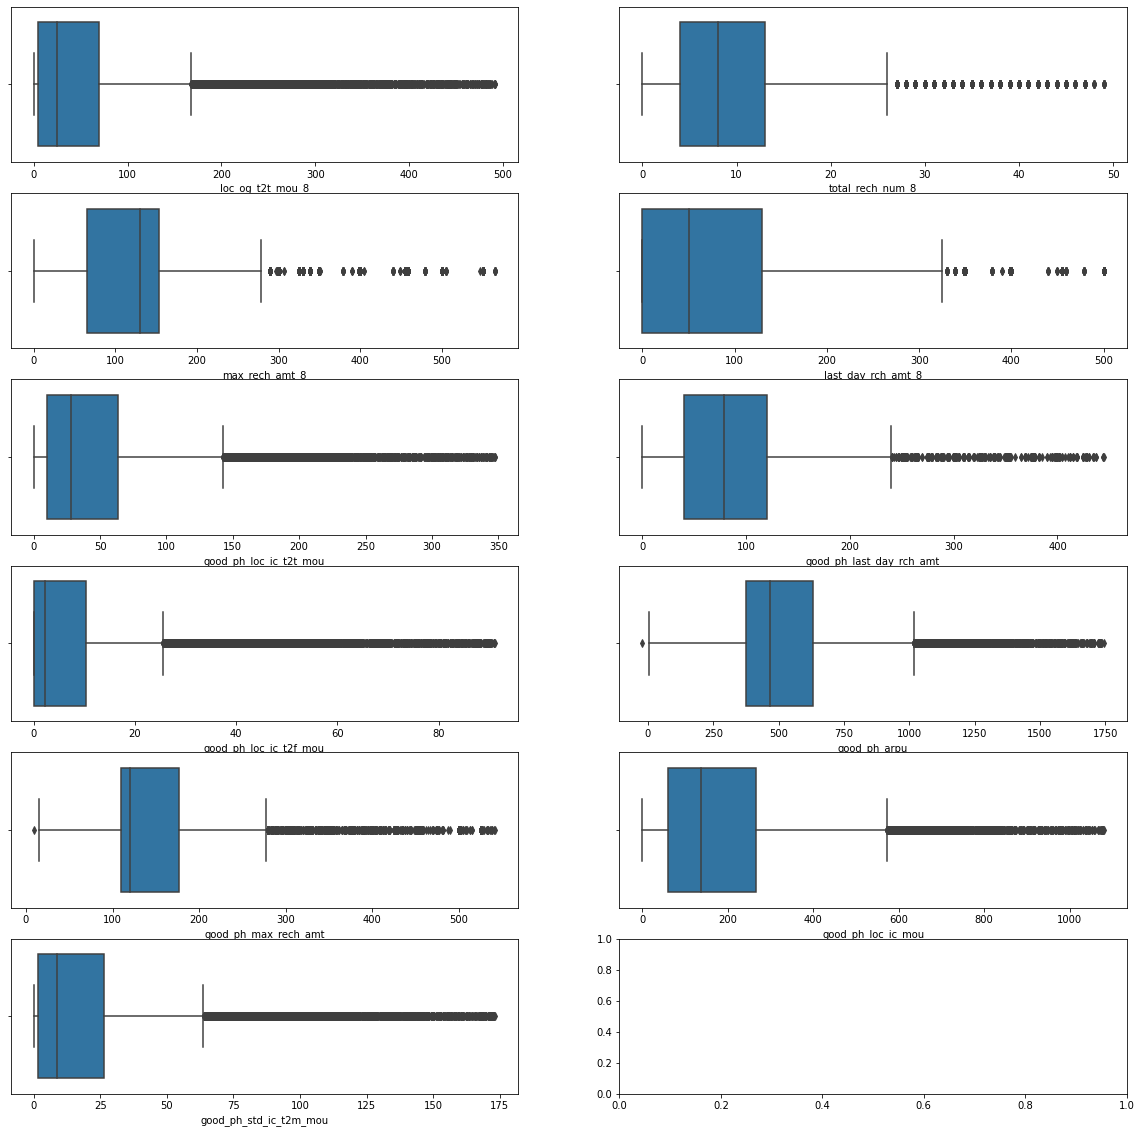

In [533]:
# Box plot after treating outliers

# List of features to plot
outliers_cols = ['loc_og_t2t_mou_8','total_rech_num_8','max_rech_amt_8', 'last_day_rch_amt_8', 'good_ph_loc_ic_t2t_mou', 'good_ph_last_day_rch_amt','good_ph_loc_ic_t2f_mou','good_ph_arpu','good_ph_max_rech_amt','good_ph_loc_ic_mou','good_ph_std_ic_t2m_mou']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

for index,col in enumerate(outliers_cols):
    i, j = divmod(index, 2)
    sns.boxplot(df_high_value_cust[col], ax=axes[i, j])
    
plt.show()

## Train-Test Split

In [534]:

#Target variable
X = df_high_value_cust.drop('churn', axis = 1)
y = df_high_value_cust['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [535]:
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (17501, 43)
 Shape of y_train is :  (17501,)
 Shape of X_test is  :  (7501, 43)
 Shape of y_test is  :  (7501,)


## Scaling

In [536]:
num_features = X_train.select_dtypes(include=['int64','float64']).columns

In [537]:
# Before scaling

X_train.head()

roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2c_mou_8  \
14559           0.00           0.00              3.41               0.0   
25670           0.00           0.00             64.34               0.0   
2438            0.00           0.00             82.56               0.0   
23562           9.06           5.83              0.00               0.0   
21757           0.00           0.00            199.23               0.0   

       std_og_t2m_mou_8  spl_og_mou_8  og_others_8  std_ic_t2t_mou_8  \
14559            164.51          0.00          0.0              1.33   
25670             18.38          7.58          0.0              0.00   
2438              35.38          5.75          0.0              0.00   
23562              0.00          0.00          0.0              0.00   
21757             61.76          0.00          0.0             33.01   

       std_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  \
14559              0.00          0.28                19              30   
25670              0.93          0.00                13             179   
2438               0.00          0.00                 7             252   
23562              0.00          0.00                 2               0   
21757              0.00          0.00                 5             150   

       last_day_rch_amt_8  count_rech_2g_8  vol_2g_mb_8  monthly_2g_8  \
14559                  30              0.0         0.00             0   
25670                  41              2.0        35.66             0   
2438                  130              0.0         0.95             0   
23562                   0              0.0         0.00             0   
21757                 150              0.0         0.00             0   

       monthly_3g_8  sachet_3g_8  tenure  good_ph_monthly_2g  \
14559             0            0    24.0                 0.0   
25670             4            0    73.0                 0.0   
2438              2            0    15.0                 0.0   
23562             0            0    18.0                 0.0   
21757             0            0    80.0                 0.0   

       good_ph_std_ic_t2t_mou  good_ph_roam_ic_mou  good_ph_roam_og_mou  \
14559                   2.635                0.000                0.000   
25670                   0.000                0.000                0.000   
2438                    2.730                0.000                0.000   
23562                   0.000                2.780               10.045   
21757                  10.640                3.955               42.880   

       good_ph_std_ic_t2m_mou  good_ph_loc_og_t2f_mou  good_ph_arpu  \
14559                   0.990                   0.000      399.1475   
25670                   0.000                   8.185      899.5950   
2438                   10.880                  10.855     1067.0095   
23562                   5.655                   0.065      308.4665   
21757                   6.280                   7.645      386.2950   

       good_ph_isd_og_mou  good_ph_spl_og_mou  good_ph_std_og_t2f_mou  \
14559                 0.0               0.000                     0.0   
25670                 0.0               7.570                     0.0   
2438                  0.0               6.050                     0.0   
23562                 0.0               2.635                     0.0   
21757                 0.1               0.655                     0.0   

       good_ph_ic_others  good_ph_total_rech_data  good_ph_vol_2g_mb  \
14559              0.000                      0.0               0.00   
25670             20.305                      3.5              32.73   
2438               0.185                      2.5               0.05   
23562              0.355                      0.0               0.00   
21757              0.000                      2.0               0.00   

       good_ph_max_rech_amt  good_ph_loc_ic_t2f_mou  good_ph_loc_ic_t2t_mou  \
14559              

In [538]:
# Scaling Train set

scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [539]:
# After scaling

X_train.head()

roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2c_mou_8  \
14559      -0.173170      -0.221642         -0.653011         -0.231105   
25670      -0.173170      -0.221642          0.118224         -0.231105   
2438       -0.173170      -0.221642          0.348847         -0.231105   
23562      -0.038646      -0.155759         -0.696174         -0.231105   
21757      -0.173170      -0.221642          1.825623         -0.231105   

       std_og_t2m_mou_8  spl_og_mou_8  og_others_8  std_ic_t2t_mou_8  \
14559         -0.024357     -0.317787     0.009112         -0.210212   
25670         -0.402523      0.035254     0.009112         -0.234888   
2438          -0.358530     -0.049979     0.009112         -0.234888   
23562         -0.450089     -0.317787     0.009112         -0.234888   
21757         -0.290261     -0.317787     0.009112          0.377553   

       std_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  \
14559         -0.136960      2.189596          1.094117       -1.146073   
25670         -0.072067     -0.251193          0.363945        0.446397   
2438          -0.136960     -0.251193         -0.366226        1.226600   
23562         -0.136960     -0.251193         -0.974703       -1.466704   
21757         -0.136960     -0.251193         -0.609617        0.136453   

       last_day_rch_amt_8  count_rech_2g_8  vol_2g_mb_8  monthly_2g_8  \
14559           -0.592642        -0.400951    -0.258624     -0.316208   
25670           -0.463078         0.696749    -0.125005     -0.316208   
2438             0.585210        -0.400951    -0.255064     -0.316208   
23562           -0.945997        -0.400951    -0.258624     -0.316208   
21757            0.820781        -0.400951    -0.258624     -0.316208   

       monthly_3g_8  sachet_3g_8    tenure  good_ph_monthly_2g  \
14559     -0.288005    -0.160078 -0.537982           -0.378021   
25670      7.328728    -0.160078  0.991132           -0.378021   
2438       3.520362    -0.160078 -0.818840           -0.378021   
23562     -0.288005    -0.160078 -0.725221           -0.378021   
21757     -0.288005    -0.160078  1.209577           -0.378021   

       good_ph_std_ic_t2t_mou  good_ph_roam_ic_mou  good_ph_roam_og_mou  \
14559               -0.219601            -0.220092            -0.292183   
25670               -0.269597            -0.220092            -0.292183   
2438                -0.217799            -0.220092            -0.292183   
23562               -0.269597            -0.177308            -0.170929   
21757               -0.067717            -0.159224             0.225423   

       good_ph_std_ic_t2m_mou  good_ph_loc_og_t2f_mou  good_ph_arpu  \
14559               -0.658538               -0.363472     -0.598703   
25670               -0.691949                0.200858      1.506044   
2438                -0.324763                0.384946      2.210144   
23562               -0.501100               -0.358991     -0.980082   
21757               -0.480007                0.163627     -0.652757   

       good_ph_isd_og_mou  good_ph_spl_og_mou  good_ph_std_og_t2f_mou  \
14559           -0.110036           -0.386259               -0.162302   
25670           -0.110036            0.055146               -0.162302   
2438            -0.110036           -0.033485               -0.162302   
23562           -0.110036           -0.232613               -0.162302   
21757           -0.098791           -0.348066               -0.162302   

       good_ph_ic_others  good_ph_total_rech_data  good_ph_vol_2g_mb  \
14559          -0.086627                -0.474263          -0.310646   
25670           1.402771                 1.208251          -0.184145   
2438           -0.073057                 0.727533          -0.310453   
23562          -0.060587                -0.474263          -0.310646   
21757          -0.086627                 0.487173          -0.310646   

       good_ph_max_rech_amt  good_ph_loc_ic_t2f_mou  good_ph_loc_ic_t2t_mou  \
14559  

## Modelling

In [540]:
# Before balancing

y_train.value_counts()

0    15896
1     1605
Name: churn, dtype: int64

### Handling Class Imbalance

In [541]:
# Using SMOTE

smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train, y_train = smt.fit_resample(X_train, y_train)
X_train.head()

roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2c_mou_8  \
0      -0.173170      -0.221642         -0.653011         -0.231105   
1      -0.173170      -0.221642          0.118224         -0.231105   
2      -0.173170      -0.221642          0.348847         -0.231105   
3      -0.038646      -0.155759         -0.696174         -0.231105   
4      -0.173170      -0.221642          1.825623         -0.231105   

   std_og_t2m_mou_8  spl_og_mou_8  og_others_8  std_ic_t2t_mou_8  \
0         -0.024357     -0.317787     0.009112         -0.210212   
1         -0.402523      0.035254     0.009112         -0.234888   
2         -0.358530     -0.049979     0.009112         -0.234888   
3         -0.450089     -0.317787     0.009112         -0.234888   
4         -0.290261     -0.317787     0.009112          0.377553   

   std_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  \
0         -0.136960      2.189596          1.094117       -1.146073   
1         -0.072067     -0.251193          0.363945        0.446397   
2         -0.136960     -0.251193         -0.366226        1.226600   
3         -0.136960     -0.251193         -0.974703       -1.466704   
4         -0.136960     -0.251193         -0.609617        0.136453   

   last_day_rch_amt_8  count_rech_2g_8  vol_2g_mb_8  monthly_2g_8  \
0           -0.592642        -0.400951    -0.258624     -0.316208   
1           -0.463078         0.696749    -0.125005     -0.316208   
2            0.585210        -0.400951    -0.255064     -0.316208   
3           -0.945997        -0.400951    -0.258624     -0.316208   
4            0.820781        -0.400951    -0.258624     -0.316208   

   monthly_3g_8  sachet_3g_8    tenure  good_ph_monthly_2g  \
0     -0.288005    -0.160078 -0.537982           -0.378021   
1      7.328728    -0.160078  0.991132           -0.378021   
2      3.520362    -0.160078 -0.818840           -0.378021   
3     -0.288005    -0.160078 -0.725221           -0.378021   
4     -0.288005    -0.160078  1.209577           -0.378021   

   good_ph_std_ic_t2t_mou  good_ph_roam_ic_mou  good_ph_roam_og_mou  \
0               -0.219601            -0.220092            -0.292183   
1               -0.269597            -0.220092            -0.292183   
2               -0.217799            -0.220092            -0.292183   
3               -0.269597            -0.177308            -0.170929   
4               -0.067717            -0.159224             0.225423   

   good_ph_std_ic_t2m_mou  good_ph_loc_og_t2f_mou  good_ph_arpu  \
0               -0.658538               -0.363472     -0.598703   
1               -0.691949                0.200858      1.506044   
2               -0.324763                0.384946      2.210144   
3               -0.501100               -0.358991     -0.980082   
4               -0.480007                0.163627     -0.652757   

   good_ph_isd_og_mou  good_ph_spl_og_mou  good_ph_std_og_t2f_mou  \
0           -0.110036           -0.386259               -0.162302   
1           -0.110036            0.055146               -0.162302   
2           -0.110036           -0.033485               -0.162302   
3           -0.110036           -0.232613               -0.162302   
4           -0.098791           -0.348066               -0.162302   

   good_ph_ic_others  good_ph_total_rech_data  good_ph_vol_2g_mb  \
0          -0.086627                -0.474263          -0.310646   
1           1.402771                 1.208251          -0.184145   
2          -0.073057                 0.727533          -0.310453   
3          -0.060587                -0.474263          -0.310646   
4          -0.086627                 0.487173          -0.310646   

   good_ph_max_rech_amt  good_ph_loc_ic_t2f_mou  good_ph_loc_ic_t2t_mou  \
0             -1.347888               -0.587476               -0.778589   
1              0.127628               -0.191831                1.095009   
2              1.258063                0.241681                0.583826  

In [542]:
# Data is now balanced using an Over Sampling technique
y_train.value_counts()

0    15896
1    15896
Name: churn, dtype: int64

In [543]:
X_train.shape

(31792, 43)

In [544]:
y_train.shape

(31792,)

In [545]:
# summary statistics of standardized variables
round(X_train.describe(),2)

roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2c_mou_8  \
count       31792.00       31792.00          31792.00          31792.00   
mean            0.07           0.09             -0.26             -0.06   
std             1.22           1.11              0.83              0.81   
min            -0.17          -0.22             -0.70             -0.23   
25%            -0.17          -0.22             -0.70             -0.23   
50%            -0.17          -0.22             -0.60             -0.23   
75%            -0.11          -0.11             -0.21             -0.23   
max            61.74          25.24              5.53             40.63   

       std_og_t2m_mou_8  spl_og_mou_8  og_others_8  std_ic_t2t_mou_8  \
count          31792.00      31792.00     31792.00          31792.00   
mean              -0.11         -0.10        -0.14             -0.08   
std                0.84          0.79         0.82              0.77   
min               -0.45         -0.32        -1.14             -0.23   
25%               -0.45         -0.32         0.01             -0.23   
50%               -0.43         -0.32         0.01             -0.23   
75%               -0.18         -0.16         0.01             -0.16   
max               35.65         36.19        93.15             41.36   

       std_ic_t2f_mou_8  spl_ic_mou_8  total_rech_num_8  max_rech_amt_8  \
count          31792.00      31792.00          31792.00        31792.00   
mean              -0.05         -0.11             -0.27           -0.37   
std                0.76          0.76              0.91            1.02   
min               -0.14         -0.25             -1.22           -1.47   
25%               -0.14         -0.25             -0.85           -1.26   
50%               -0.14         -0.25             -0.55           -0.30   
75%               -0.14         -0.25             -0.00            0.07   
max               66.39         10.73              4.74            4.57   

       last_day_rch_amt_8  count_rech_2g_8  vol_2g_mb_8  monthly_2g_8  \
count            31792.00         31792.00     31792.00      31792.00   
mean                -0.31            -0.14        -0.10         -0.13   
std                  0.90             0.80         0.78          0.78   
min                 -0.95            -0.40        -0.26         -0.32   
25%                 -0.95            -0.40        -0.26         -0.32   
50%                 -0.71            -0.40        -0.26         -0.32   
75%                  0.27            -0.40        -0.26         -0.32   
max                  4.94            18.26        27.37         10.90   

       monthly_3g_8  sachet_3g_8    tenure  good_ph_monthly_2g  \
count      31792.00     31792.00  31792.00            31792.00   
mean          -0.11        -0.05     -0.20               -0.12   
std            0.78         0.82      0.89                0.82   
min           -0.29        -0.16     -1.10               -0.38   
25%           -0.29        -0.16     -0.83               -0.38   
50%           -0.29        -0.16     -0.54               -0.38   
75%           -0.29        -0.16      0.12               -0.38   
max           16.85        29.98      3.21               12.83   

       good_ph_std_ic_t2t_mou  good_ph_roam_ic_mou  good_ph_roam_og_mou  \
count                31792.00             31792.00             31792.00   
mean                     0.00                 0.06                 0.11   
std                      0.94                 1.31                 1.23   
min                     -0.27                -0.22                -0.29   
25%                     -0.26                -0.22                -0.29   
50%                     -0.21                -0.22                -0.29   
75%                     -0.05                -0.14                -0.10   
max                     31.85                46.88                18.38   

       good_ph_std_ic_t2m_mou  good_ph_loc_og_t2f_mou  good_ph_arpu  \
count 

## High Performance Model

### Feature generation with PCA

In [546]:
from sklearn.decomposition import PCA

In [547]:
# Instantiate the PCA object

pca = PCA(svd_solver='randomized',random_state=101)

In [548]:
# Fitting PCA on the train set

pca.fit(X_train)

PCA(random_state=101, svd_solver='randomized')

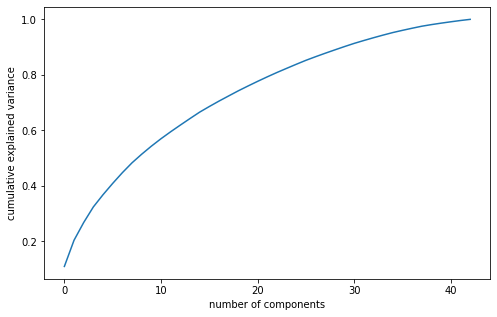

In [550]:
# Making Scree-plot for the PCA components
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* We can see that `35 components` explain amost more than 95% variance of the data. So, we will perform PCA with `35 components`.

In [551]:
# Final PCA Model

pca2 = PCA(n_components=35,random_state=101)

In [552]:
# Final X_train set with PCA

X_train_pca = pca2.fit_transform(X_train)

In [553]:
# Final X_test set with PCA

X_test_pca = pca2.transform(X_test)

### Creating Logistic Regression model with PCA

In [555]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C":np.logspace(-3,3,7)}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity.
model_cv = GridSearchCV(estimator = LogisticRegression(class_weight= 'balanced', random_state=101),
                        param_grid = params, 
                        scoring= 'recall',
                        n_jobs=-1,
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=101),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, scoring='recall', verbose=1)

In [556]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.123615      0.005702         0.006148        0.000433   0.001   
1       0.200449      0.012902         0.006232        0.000180    0.01   
2       0.246890      0.015118         0.005944        0.000121     0.1   
3       0.258315      0.016364         0.005714        0.000198     1.0   
4       0.257207      0.015286         0.006040        0.000216    10.0   
5       0.261641      0.017644         0.006163        0.000197   100.0   
6       0.242352      0.035875         0.005208        0.001105  1000.0   

          params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.001}           0.833386           0.849984           0.826073   
1    {'C': 0.01}           0.834973           0.850630           0.825760   
2     {'C': 0.1}           0.834656           0.847721           0.824820   
3     {'C': 1.0}           0.833386           0.847074           0.824506   
4    {'C': 10.0}           0.833386           0.847074           0.824820   
5   {'C': 100.0}           0.833386           0.847074           0.824820   
6  {'C': 1000.0}           0.833386           0.847074           0.824820   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.836666           0.845171         0.838256        0.008486   
1           0.833590           0.840810         0.837153        0.008274   
2           0.834205           0.839252         0.836131        0.007455   
3           0.833590           0.838318         0.835375        0.007359   
4           0.833590           0.838629         0.835500        0.007293   
5           0.833590           0.838629         0.835500        0.007293   
6           0.833590           0.838629         0.835500        0.007293   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.838211            0.835664   
1                2            0.837270            0.835195   
2                3            0.837191            0.834804   
3                7            0.836720            0.834648   
4                4            0.836720            0.834882   
5                4            0.836642            0.834882   
6                4            0.836642            0.834882   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.840457            0.840016            0.836749   
1            0.837702            0.838750            0.836907   
2            0.837623            0.838671            0.836119   
3            0.836285            0.838434            0.835409   
4            0.836049            0.838513            0.835567   
5            0.836049            0.838513            0.835567   
6            0.836049            0.838513            0.835567   

   mean_train_score  std_train_score  
0          0.838219         0.001840  
1          0.837165         0.001163  
2          0.836882         0.001323  
3          0.836299         0.001285  
4          0.836346         0.001239  
5          0.836331         0.001235  
6          0.836331         0.001235

In [557]:
# Instantiate the model with best C
logistic_pca_final = LogisticRegression(C=0.1, class_weight= 'balanced', random_state=101)

In [558]:
# Fit the model on the train set
logit_pca_model = logistic_pca_final.fit(X_train_pca, y_train)

#### Prediction on the train set

In [559]:
# Predictions on the train set
y_train_pred = logit_pca_model.predict(X_train_pca)

In [560]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13392  2504]
 [ 2594 13302]]


In [561]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [562]:
#ROC-AUC score
print("ROC-AUC score:-",metrics.roc_auc_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC-AUC score:- 0.8396451937594365
Sensitivity:- 0.8368142929038752
Specificity:- 0.8424760946149975


#### Prediction on the test set

In [563]:
# Prediction on the test set
y_test_pred = logit_pca_model.predict(X_test_pca)

In [564]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5794 1025]
 [ 134  548]]


In [565]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [566]:
#ROC-AUC score
print("ROC-AUC score:-",metrics.roc_auc_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC-AUC score:- 0.8266018830428521
Sensitivity:- 0.8035190615835777
Specificity:- 0.8496847045021264


Model summary

- **Train set** <br>
ROC-AUC score = 0.839<br>
Sensitivity = 0.836<br>
Specificity = 0.842<br>
- **Test set**<br>
ROC-AUC score = 0.826<br>
Sensitivity = 0.803<br>
Specificity = 0.849<br>

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Creating Decision Tree Model with PCA

In [567]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree_pca = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree_pca, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           n_jobs= -1,
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [568]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.938098      0.015857         0.006498        0.000361   
1       0.922825      0.006346         0.006668        0.000995   
2       0.950275      0.035588         0.006586        0.000684   
3       0.933468      0.007627         0.006280        0.000300   
4       1.529693      0.024253         0.006453        0.000348   
5       1.504813      0.021381         0.006440        0.000221   
6       1.406684      0.006498         0.006355        0.000192   
7       1.403195      0.014114         0.005777        0.001033   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.760302   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.760302   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.762818   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.762818   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.796162   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.798679   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.796477   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.796477   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.812264           0.831394           0.829192           0.832652   
1           0.812264           0.831394           0.829192           0.832652   
2           0.807862           0.827933           0.832966           0.820698   
3           0.807862           0.827933           0.832966           0.820698   
4           0.842453           0.845549           0.841145           0.837685   
5           0.842453           0.845549           0.841145           0.837685   
6           0.794969           0.847751           0.832966           0.836112   
7           0.794969           0.849324           0.832966           0.836112   

   mean_test_score  std_test_score  rank_test_score  
0         0.813161        0.027438                5  
1         0.813161        0.027438                5  
2         0.810456        0.025271                7  
3         0.810456        0.025271                7  
4         0.832599        0.018392                2  
5         0.833102        0.017395                1  
6         0.821655        0.021744                4  
7         0.821969        0.022127                3

In [569]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8331020790921555
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [570]:
# Model with optimal hyperparameters
dtree_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 101,
                                  max_depth=10, min_samples_leaf=50, min_samples_split=50)

dtree_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=101)

#### Making predictions on the train set

In [571]:
# Predictions on the train set
y_train_pred = dtree_pca_model.predict(X_train_pca)

In [572]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13741  2155]
 [ 2200 13696]]


In [573]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [574]:
#ROC-AUC score
print("ROC-AUC score:-",metrics.roc_auc_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC-AUC score:- 0.8630158530447911
Sensitivity:- 0.8616004026170105
Specificity:- 0.8644313034725717


#### Making predictions on the test set

In [575]:
# Prediction on the test set
y_test_pred = dtree_pca_model.predict(X_test_pca)

In [576]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5775 1044]
 [ 190  492]]


In [577]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [578]:
#ROC-AUC score
print("ROC-AUC score:-",metrics.roc_auc_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC-AUC score:- 0.7841529984143839
Sensitivity:- 0.7214076246334311
Specificity:- 0.8468983721953366


Model summary

- **Train set** <br>
ROC-AUC score = 0.863<br>
Sensitivity = 0.861<br>
Specificity = 0.864<br>
- **Test set**<br>
ROC-AUC score = 0.784<br>
Sensitivity = 0.721<br>
Specificity = 0.846<br>

We can see from the model performance that the sensitivity has been decreased while evaluating the model on the test set but the accuracy and specificity is good in the test set.

### Creating a Random Forest Model with PCA

In [587]:
param_grid = {'max_depth': [12,18,20],
              'min_samples_leaf': [10,20],
              'min_samples_split': [10,20,30],
              'n_estimators': [100,200,300]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs=None,
                           verbose = 2, 
                           return_train_score=True)



In [588]:
# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   9.7s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   9.8s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   9.7s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  19.3s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  19.6s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  19.5s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  29.2s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  29.2s
[CV] END max_depth=12, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  29.1s
[CV] END ma

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 18, 20],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=2)

In [589]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9059515277850668 using {'max_depth': 18, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [590]:
# model with the best hyperparameters

rfc_model_pca = RandomForestClassifier(bootstrap=True,
                             max_depth=18,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             n_estimators=300)

In [591]:
# Fit the model
rfc_model_pca.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300)

#### Making predictions on the train set

In [592]:
# Predictions on the train set
y_train_pred = rfc_model_pca.predict(X_train_pca)

In [593]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15180   716]
 [  430 15466]]


In [594]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [595]:
#ROC-AUC score
print("ROC-AUC score:-",metrics.roc_auc_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC-AUC score:- 0.9639531957725214
Sensitivity:- 0.9729491696024157
Specificity:- 0.9549572219426271


#### Making predictions on the test set

In [596]:
# Prediction on the test set
y_test_pred = rfc_model_pca.predict(X_test_pca)

In [597]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6309  510]
 [ 228  454]]


In [598]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [599]:
#ROC-AUC score
print("ROC-AUC score:-",metrics.roc_auc_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

ROC-AUC score:- 0.7954490622415632
Sensitivity:- 0.6656891495601173
Specificity:- 0.9252089749230092


Model summary

- **Train set** <br>
ROC-AUC score = 0.963<br>
Sensitivity = 0.972<br>
Specificity = 0.954<br>
- **Test set**<br>
ROC-AUC score = 0.795<br>
Sensitivity = 0.665<br>
Specificity = 0.925<br>

We can see from the model performance that the sensitivity has been decreased while evaluating the model on the test.

### Final conclusion with PCA


After trying several models we can see that for achieving the best sensitivity, which was our ultimate goal, the classic Logistic regression with PCA performs well with sensitivity of 80.3% in the test data. Also we have good ROC-AUC score of 82.6% in that model in the test data.

### Model 1: Interpretable Model : Logistic Regression

Next step will use RFE, we have close to 43 features. It is not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination(RFE) to select features

In [600]:
# Feature Selection Using RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [602]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('roam_ic_mou_8', False, 15),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 19),
 ('std_og_t2m_mou_8', False, 7),
 ('spl_og_mou_8', False, 8),
 ('og_others_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2f_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 13),
 ('last_day_rch_amt_8', True, 1),
 ('count_rech_2g_8', True, 1),
 ('vol_2g_mb_8', False, 9),
 ('monthly_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_8', False, 12),
 ('tenure', True, 1),
 ('good_ph_monthly_2g', False, 11),
 ('good_ph_std_ic_t2t_mou', False, 2),
 ('good_ph_roam_ic_mou', False, 26),
 ('good_ph_roam_og_mou', False, 22),
 ('good_ph_std_ic_t2m_mou', False, 29),
 ('good_ph_loc_og_t2f_mou', False, 6),
 ('good_ph_arpu', True, 1),
 ('good_ph_isd_og_mou', False, 28),
 ('good_ph_spl_og_mou', False, 21),
 ('good_ph_std_og_t2f_mou', False, 16),
 ('good_ph_ic_others', False, 4),
 ('good_ph_total_rech_data'

In [603]:
# RFE selected columns
col = list(X_train.columns[rfe.support_])

print(col)

['roam_og_mou_8', 'loc_og_t2t_mou_8', 'og_others_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'count_rech_2g_8', 'monthly_2g_8', 'monthly_3g_8', 'tenure', 'good_ph_arpu', 'good_ph_loc_ic_t2t_mou', 'good_ph_loc_ic_mou']


In [604]:
len(col)

15

In [605]:
X_train.columns[~rfe.support_]

Index(['roam_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2m_mou_8', 'spl_og_mou_8',
       'max_rech_amt_8', 'vol_2g_mb_8', 'sachet_3g_8', 'good_ph_monthly_2g',
       'good_ph_std_ic_t2t_mou', 'good_ph_roam_ic_mou', 'good_ph_roam_og_mou',
       'good_ph_std_ic_t2m_mou', 'good_ph_loc_og_t2f_mou',
       'good_ph_isd_og_mou', 'good_ph_spl_og_mou', 'good_ph_std_og_t2f_mou',
       'good_ph_ic_others', 'good_ph_total_rech_data', 'good_ph_vol_2g_mb',
       'good_ph_max_rech_amt', 'good_ph_loc_ic_t2f_mou', 'good_ph_isd_ic_mou',
       'good_ph_spl_ic_mou', 'good_ph_loc_og_t2c_mou',
       'good_ph_last_day_rch_amt', 'good_ph_og_others',
       'good_ph_count_rech_3g', 'good_ph_vbc_3g'],
      dtype='object')

### Model-1 with RFE selected columns

In [606]:
# Defining a function to train a statsmodel OLS based model, to avoid writing repeated code.

def stats_model_logm(columns):
    X_train_sm_1 = sm.add_constant(X_train[columns])
    no_pca_1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial()).fit()
    return no_pca_1

In [607]:
# Creating a function to calculate VIF for different variables

def VIF_calc(columns):
    df_X = X_train[columns].copy()
    vif = pd.DataFrame()
    vif['Features'] = df_X.columns
    vif['VIF'] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF',ascending=False))

In [608]:
logm_sm = stats_model_logm(col)
logm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31792
Model:                            GLM   Df Residuals:                    31776
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12137.
Date:                Tue, 07 Jun 2022   Deviance:                       24275.
Time:                        10:25:28   Pearson chi2:                 9.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6968      0.028    -60.881      0.000      -1.751      -1.642
roam_og_mou_8              0.3415      0.017     20.185      0.000       0.308       0.375
loc_og_t2t_mou_8          -0.8243      0.038    -21.652      0.000      -0.899      -0.750
og_others_8               -3.1373      0.122    -25.805      0.000      -3.376      -2.899
std_ic_t2t_mou_8          -0.4649      0.046    -10.066      0.000      -0.555      -0.374
std_ic_t2f_mou_8          -0.3665      0.064     -5.770      0.000      -0.491      -0.242
spl_ic_mou_8              -0.7410      0.045    -16.574      0.000      -0.829      -0.653
total_rech_num_8          -0.7354      0.022    -33.495      0.000      -0.778      -0.692
last_day_rch_amt_8        -0.9842      0.024    -40.634      0.000      -1.032      -0.937
count_rech_2g_8           -0.3122      0.028    -11.277      0.000      -0.366      -0.258
monthly_2g_8              -0.4975      0.033    -14.968      0.000      -0.563      -0.432
monthly_3g_8              -0.7005      0.039    -17.824      0.000      -0.777      -0.623
tenure                    -0.4145      0.021    -19.877      0.000      -0.455      -0.374
good_ph_arpu               0.3782      0.019     20.205      0.000       0.341       0.415
good_ph_loc_ic_t2t_mou     0.3362      0.029     11.595      0.000       0.279       0.393
good_ph_loc_ic_mou        -0.5300      0.030    -17.914      0.000      -0.588      -0.472
==========================================================================================
"""

In [609]:
VIF_calc(col)

                  Features   VIF
13  good_ph_loc_ic_t2t_mou  2.22
14      good_ph_loc_ic_mou  2.18
1         loc_og_t2t_mou_8  1.64
7       last_day_rch_amt_8  1.39
6         total_rech_num_8  1.34
11                  tenure  1.23
8          count_rech_2g_8  1.21
9             monthly_2g_8  1.12
10            monthly_3g_8  1.12
12            good_ph_arpu  1.11
2              og_others_8  1.08
0            roam_og_mou_8  1.06
5             spl_ic_mou_8  1.05
3         std_ic_t2t_mou_8  1.03
4         std_ic_t2f_mou_8  1.02


In [610]:
# From the model summary and the VIF list
# The p values are now significant in this model and are <=0.05
## Above VIFs looks good and are <=5

# Hence, this model could be used as the interpretable logistic regression model.

In [611]:
# Prediction 

X_train_const = sm.add_constant(X_train[col])
y_train_pred_lr_prob = logm_sm.predict(X_train_const)
y_train_pred_lr_prob.head()


0    0.093538
1    0.001207
2    0.052088
3    0.786315
4    0.026115
dtype: float64

In [612]:
y_train_pred_lr_prob.shape

(31792,)

In [613]:
X_train.shape

(31792, 43)

In [614]:

X_test_const = sm.add_constant(X_test[col])
y_test_pred_lr_prob = logm_sm.predict(X_test_const)
y_test_pred_lr_prob.head()

16085    0.048117
20688    0.429922
4511     0.031507
24637    0.185776
21712    0.007175
dtype: float64

In [615]:
# To retain the the index converting test and train to a series

y_train_pred_lr_prob = pd.Series(y_train_pred_lr_prob,index = X_train.index) 
y_test_pred_lr_prob = pd.Series(y_test_pred_lr_prob,index = X_test.index)

In [644]:

# Function for calculation of metrics for each threshold
def lr_metrics(matrix,actual_label, predicted_lablel) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    roc_auc = metrics.roc_auc_score(actual_label, predicted_lablel)
    print(f'ROC-AUC Score :{roc_auc:.3f}')
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))


In [617]:
# Prediction at threshold of 0.5 
   
y_train_pred_lr_predicted = y_train_pred_lr_prob.map(lambda x : 1 if x > 0.5 else 0)
y_test_pred_lr_predicted = y_test_pred_lr_prob.map(lambda x : 1 if x > 0.5 else 0)


In [618]:
# Confusion matrix

train_matrix = confusion_matrix(y_train, y_train_pred_lr_predicted)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_predicted)
print('\nConfusion Matrix for test: \n', test_matrix)


Confusion Matrix for train:
 [[13201  2695]
 [ 2358 13538]]

Confusion Matrix for test: 
 [[5686 1133]
 [ 121  561]]


In [649]:
# Model Performance : 

print('Train Performance : \n')
lr_metrics(train_matrix,y_train, y_train_pred_lr_prob)

print('\n\nTest Performance : \n')
lr_metrics(test_matrix,y_test, y_test_pred_lr_prob)

Train Performance : 

Accuracy : 0.841
ROC-AUC Score :0.913
Sensitivity / True Positive Rate / Recall : 0.852
Specificity / True Negative Rate :  0.83
Precision / Positive Predictive Value : 0.834
F1-score : 0.843


Test Performance : 

Accuracy : 0.833
ROC-AUC Score :0.898
Sensitivity / True Positive Rate / Recall : 0.823
Specificity / True Negative Rate :  0.834
Precision / Positive Predictive Value : 0.331
F1-score : 0.472


In [620]:
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [621]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred_lr_prob, drop_intermediate = False )

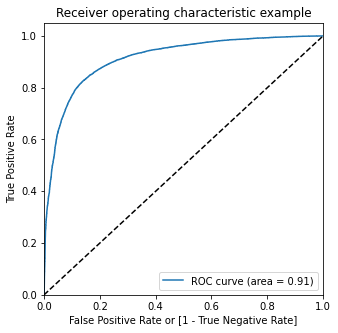

In [622]:
roc_curve(y_train, y_train_pred_lr_prob)

#### Finding Optimum Probability Cutoff

In [623]:
# Classification of churn at probability thresholds between 0 and 1 

y_train_pred_prob = pd.DataFrame(index=X_train.index)
numbers = [float(x)/10 for x in range(10)]

def prob_between_zero_to_one(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in numbers:
    y_train_pred_prob[i]= y_train_pred_lr_prob.map(lambda x : prob_between_zero_to_one(x,i))
y_train_pred_prob.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    1    0    0    0    0    0    0    0    0    0
1    1    0    0    0    0    0    0    0    0    0
2    1    0    0    0    0    0    0    0    0    0
3    1    1    1    1    1    1    1    1    0    0
4    1    0    0    0    0    0    0    0    0    0

In [624]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.693256  0.976535  0.409977
0.2   0.2  0.760978  0.953636  0.568319
0.3   0.3  0.802655  0.929605  0.675705
0.4   0.4  0.829800  0.893181  0.766419
0.5   0.5  0.841061  0.851661  0.830460
0.6   0.6  0.840369  0.794099  0.886638
0.7   0.7  0.815677  0.704202  0.927151
0.8   0.8  0.755316  0.548251  0.962380
0.9   0.9  0.662494  0.336311  0.988676


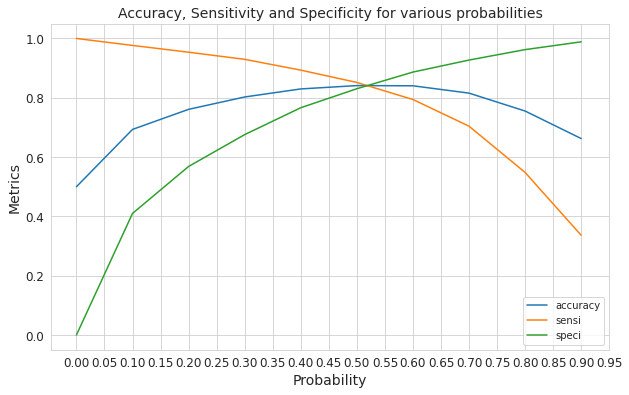

In [625]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

#### From the curve above, 0.52 can be taken as the optimum point to take it as a cutoff probability¶

In [626]:
y_train_pred_lr_final = y_train_pred_lr_prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_lr_final.head()

0    0
1    0
2    0
3    1
4    0
dtype: int64

In [627]:
y_test_pred_lr_final = y_test_pred_lr_prob.map(lambda x : 1 if x > 0.52 else 0)

y_test_pred_lr_final.head(15)

16085    0
20688    0
4511     0
24637    0
21712    0
20353    0
27779    0
28091    0
12598    0
29651    0
5442     0
21702    0
26395    0
10424    1
11742    0
dtype: int64

In [628]:
# Confusion matrix

train_matrix_final = confusion_matrix(y_train, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix_final)
test_matrix_final = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix_final)


Confusion Matrix for train:
 [[13394  2502]
 [ 2520 13376]]

Confusion Matrix for test: 
 [[5774 1045]
 [ 129  553]]


In [648]:
print('Performance of the train model :\n')
lr_metrics(train_matrix_final,y_train, y_train_pred_lr_prob)

print('\nPerformance of the test model :\n')
lr_metrics(test_matrix_final,y_test, y_test_pred_lr_prob)

Performance of the train model :

Accuracy : 0.842
ROC-AUC Score :0.913
Sensitivity / True Positive Rate / Recall : 0.841
Specificity / True Negative Rate :  0.843
Precision / Positive Predictive Value : 0.842
F1-score : 0.841

Performance of the test model :

Accuracy : 0.843
ROC-AUC Score :0.898
Sensitivity / True Positive Rate / Recall : 0.811
Specificity / True Negative Rate :  0.847
Precision / Positive Predictive Value : 0.346
F1-score : 0.485


#### ROC-AUC Curve

In [630]:
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [631]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred_lr_prob, drop_intermediate = False )

Train - ROC AUC score:


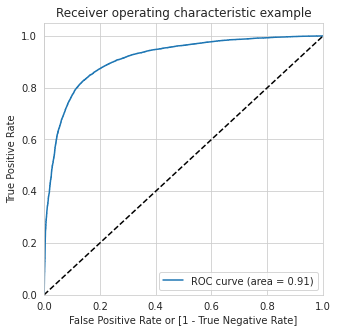

In [646]:
print('Train - ROC AUC score:')

roc_curve(y_train, y_train_pred_lr_prob)

In [633]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred_lr_prob, drop_intermediate = False )

Test - ROC AUC score:


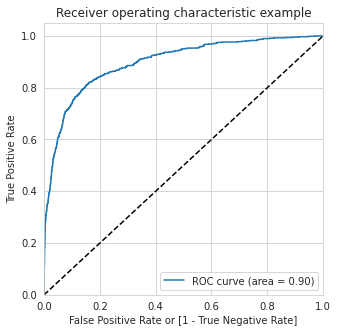

In [634]:
print('Test - ROC AUC score:')

roc_curve(y_test, y_test_pred_lr_prob)

## Determining Feature Importance

In [639]:
model_parameters = logm_sm.params[1:]
model_parameters

roam_og_mou_8             0.341547
loc_og_t2t_mou_8         -0.824312
og_others_8              -3.137291
std_ic_t2t_mou_8         -0.464874
std_ic_t2f_mou_8         -0.366455
spl_ic_mou_8             -0.740996
total_rech_num_8         -0.735352
last_day_rch_amt_8       -0.984211
count_rech_2g_8          -0.312194
monthly_2g_8             -0.497508
monthly_3g_8             -0.700463
tenure                   -0.414491
good_ph_arpu              0.378161
good_ph_loc_ic_t2t_mou    0.336197
good_ph_loc_ic_mou       -0.530035
dtype: float64

In [636]:
# Ranking feature variables based on their relative coefficient values

sorted_index = np.argsort(model_parameters,kind='quicksort')
sorted_index

roam_og_mou_8              2
loc_og_t2t_mou_8           7
og_others_8                1
std_ic_t2t_mou_8           5
std_ic_t2f_mou_8           6
spl_ic_mou_8              10
total_rech_num_8          14
last_day_rch_amt_8         9
count_rech_2g_8            3
monthly_2g_8              11
monthly_3g_8               4
tenure                     8
good_ph_arpu              13
good_ph_loc_ic_t2t_mou     0
good_ph_loc_ic_mou        12
dtype: int64

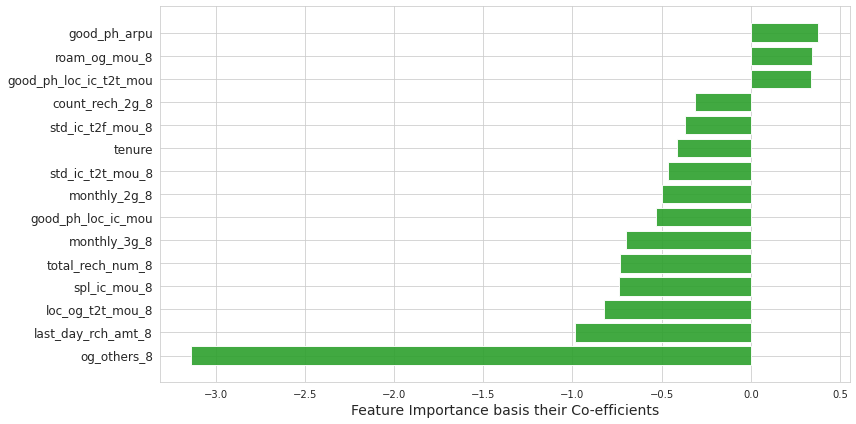

In [637]:
# Plotting the Feature Importance of each feature in the model for better visualization.
pos = np.arange(sorted_index.shape[0])

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, model_parameters[sorted_index], align='center', color = 'tab:green',alpha=0.9)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[sorted_index], fontsize=12)
ax.set_xlabel('Feature Importance basis their Co-efficients', fontsize=14)

plt.tight_layout()   
plt.show()

## Final Observations and Recommendations

#### The Final Evaluation Metrics for the train Dataset: 

* The Accuracy is    : 0.842
* The ROC-AUC score  : 0.913
* The Sensitivity is : 0.841
* The Specificity is : 0.843

    
#### The Final Evaluation Metrics for the test Dataset: 

* The Accuracy is    : 0.843
* The ROC-AUC score  : 0.898
* The Sensitivity is : 0.811
* The Specificity is : 0.847

    


So using Logistic regression we are geting an ROC-AUC of 91.3% on train data and 89.8% on test data

We can clearly see most of the critical features are from the action phase, which is inline with the business understanding that action phase needs more attention

### Recomendations

* Focus on customers, whose outgoing others `og_others_8` in the action phase is less and provide offers/facilities on outgoing calls as necessary to prevent them from churning.
* Focus on customers, whose last recharge amount `last_day_rch_amt_8` in the action phase is less and provide offers/facilities on recharges as necessary to prevent them from churning.
* Customers whose local outgoing operator T to T, i.e. within same operator (mobile to mobile) is lesser in the action phase than the good phase, has a higher probability to churn. These customers have to be given attention by means of offers/facilities as deemed necessary.
* Cutomers, whose monthly 3G data usage August is less, are likely to be churned.
* Customers with decreasing monthly 2G data usage for August are most probable to churn.
* Ensure that customers with high good phase arpu are actually satisfied with the network and services offers so that they don't churn eventually.
* Customers, whose roaming outgoing minutes of usage is increasing are more likely to churn. Get in touch with those customers in an one-to-one basis and ensure they are not facing any network/call related issues while roaming
